In [1]:
#Chunk that sloads necessary packages & sets working environment to where the jupyterlab notebook file is 
%load_ext autoreload
%autoreload 2
import gnssvod as gv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pdb
import importlib
import zipfile
import os
import xarray as xr
import glob
import shutil
from gnssvod.hemistats.hemistats import hemibuild
#import georinex as gr
from matplotlib.collections import PatchCollection
import matplotlib.dates as mdates
import shutil
from matplotlib import rcParams
from datetime import datetime, timedelta

In [2]:
#pairing and concatenating--- starting by establishing path to .nc files per station
##here MACROCOSM 5 & 1 are references
# MACROCOSM 3 is located in-
#MACROCOSM 2 is located in-
#MACROCOSM-7 is located in-
pattern={'MACROCOSM-1':'/Volumes/coraldelmar/march_collection/MACROCOSM-1/nc/*.nc',
        'MACROCOSM-2':'/Volumes/coraldelmar/march_collection/MACROCOSM-2/nc/*.nc',
        'MACROCOSM-3':'/Volumes/coraldelmar/march_collection/MACROCOSM-3/nc/*.nc',
        'MACROCOSM-5':'/Volumes/coraldelmar/march_collection/MACROCOSM-5/nc/*.nc',
        'MACROCOSM-7':'/Volumes/coraldelmar/march_collection/MACROCOSM-7/nc/*.nc'}

In [3]:
startday = start=pd.to_datetime('01-01-2023',format='%d-%m-%Y')
timeintervals=pd.interval_range(start=startday, periods=900, freq='D', closed='left')
timeintervals

IntervalIndex([[2023-01-01 00:00:00, 2023-01-02 00:00:00),
               [2023-01-02 00:00:00, 2023-01-03 00:00:00),
               [2023-01-03 00:00:00, 2023-01-04 00:00:00),
               [2023-01-04 00:00:00, 2023-01-05 00:00:00),
               [2023-01-05 00:00:00, 2023-01-06 00:00:00),
               [2023-01-06 00:00:00, 2023-01-07 00:00:00),
               [2023-01-07 00:00:00, 2023-01-08 00:00:00),
               [2023-01-08 00:00:00, 2023-01-09 00:00:00),
               [2023-01-09 00:00:00, 2023-01-10 00:00:00),
               [2023-01-10 00:00:00, 2023-01-11 00:00:00),
               ...
               [2025-06-09 00:00:00, 2025-06-10 00:00:00),
               [2025-06-10 00:00:00, 2025-06-11 00:00:00),
               [2025-06-11 00:00:00, 2025-06-12 00:00:00),
               [2025-06-12 00:00:00, 2025-06-13 00:00:00),
               [2025-06-13 00:00:00, 2025-06-14 00:00:00),
               [2025-06-14 00:00:00, 2025-06-15 00:00:00),
               [2025-06-15 00:00:00, 

concatenating with reference station first
different pairings:
-> 5 & 1 - MACROCOSM-5.1
-> 5& 2- MACROCOSM-5.2
-> 5& 3- MACROCOSM-5.3
->5& 7- MACROCOSM-5.7
-> 1& 5- MACROCOSM-1.5
-> 1& 2- MACROCOSM-1.2
-> 1& 3- MACROCOSM-1.3
-> 1& 7- MACROCOSM-1.7

In [4]:
#MACROCOSM 1.5
pairings={'MACROCOSM-1.5':('MACROCOSM-1','MACROCOSM-5')}
outputdir={'MACROCOSM-1.5':'/Volumes/coraldelmar/march_collection/MACROCOSM-1.5'}
keepvars=['S*','Azimuth','Elevation']
out=gv.gather_stations(pattern,pairings,timeintervals,outputresult=True)

Extracting Epochs from files
----- Processing MACROCOSM-1.5
-- Processing interval [2023-01-01 00:00:00, 2023-01-02 00:00:00)
Found 0 file(s) for MACROCOSM-1
No data for station MACROCOSM-1.
Found 0 file(s) for MACROCOSM-5
No data for station MACROCOSM-5.
No data at all for that interval, skipping..
-- Processing interval [2023-01-02 00:00:00, 2023-01-03 00:00:00)
Found 0 file(s) for MACROCOSM-1
No data for station MACROCOSM-1.
Found 0 file(s) for MACROCOSM-5
No data for station MACROCOSM-5.
No data at all for that interval, skipping..
-- Processing interval [2023-01-03 00:00:00, 2023-01-04 00:00:00)
Found 0 file(s) for MACROCOSM-1
No data for station MACROCOSM-1.
Found 0 file(s) for MACROCOSM-5
No data for station MACROCOSM-5.
No data at all for that interval, skipping..
-- Processing interval [2023-01-04 00:00:00, 2023-01-05 00:00:00)
Found 0 file(s) for MACROCOSM-1
No data for station MACROCOSM-1.
Found 0 file(s) for MACROCOSM-5
No data for station MACROCOSM-5.
No data at all for th

In [5]:
#MACROCOSM 5.3
pairings={'MACROCOSM-5.3':('MACROCOSM-5','MACROCOSM-3')}
outputdir={'MACROCOSM-5.3':'/Volumes/coraldelmar/march_collection/MACROCOSM-5.3'}
keepvars=['S*','Azimuth','Elevation']
out=gv.gather_stations(pattern,pairings,timeintervals,outputresult=True)

Extracting Epochs from files
----- Processing MACROCOSM-5.3
-- Processing interval [2023-01-01 00:00:00, 2023-01-02 00:00:00)
Found 0 file(s) for MACROCOSM-5
No data for station MACROCOSM-5.
Found 0 file(s) for MACROCOSM-3
No data for station MACROCOSM-3.
No data at all for that interval, skipping..
-- Processing interval [2023-01-02 00:00:00, 2023-01-03 00:00:00)
Found 0 file(s) for MACROCOSM-5
No data for station MACROCOSM-5.
Found 0 file(s) for MACROCOSM-3
No data for station MACROCOSM-3.
No data at all for that interval, skipping..
-- Processing interval [2023-01-03 00:00:00, 2023-01-04 00:00:00)
Found 0 file(s) for MACROCOSM-5
No data for station MACROCOSM-5.
Found 0 file(s) for MACROCOSM-3
No data for station MACROCOSM-3.
No data at all for that interval, skipping..
-- Processing interval [2023-01-04 00:00:00, 2023-01-05 00:00:00)
Found 0 file(s) for MACROCOSM-5
No data for station MACROCOSM-5.
Found 0 file(s) for MACROCOSM-3
No data for station MACROCOSM-3.
No data at all for th

In [6]:
#MACROCOSM 5.3
pairings={'MACROCOSM-5.2':('MACROCOSM-5','MACROCOSM-2')}
outputdir={'MACROCOSM-5.2':'/Volumes/coraldelmar/march_collection/MACROCOSM-5.2'}
keepvars=['S*','Azimuth','Elevation']
out=gv.gather_stations(pattern,pairings,timeintervals,outputresult=True)

Extracting Epochs from files
----- Processing MACROCOSM-5.2
-- Processing interval [2023-01-01 00:00:00, 2023-01-02 00:00:00)
Found 0 file(s) for MACROCOSM-5
No data for station MACROCOSM-5.
Found 0 file(s) for MACROCOSM-2
No data for station MACROCOSM-2.
No data at all for that interval, skipping..
-- Processing interval [2023-01-02 00:00:00, 2023-01-03 00:00:00)
Found 0 file(s) for MACROCOSM-5
No data for station MACROCOSM-5.
Found 0 file(s) for MACROCOSM-2
No data for station MACROCOSM-2.
No data at all for that interval, skipping..
-- Processing interval [2023-01-03 00:00:00, 2023-01-04 00:00:00)
Found 0 file(s) for MACROCOSM-5
No data for station MACROCOSM-5.
Found 0 file(s) for MACROCOSM-2
No data for station MACROCOSM-2.
No data at all for that interval, skipping..
-- Processing interval [2023-01-04 00:00:00, 2023-01-05 00:00:00)
Found 0 file(s) for MACROCOSM-5
No data for station MACROCOSM-5.
Found 0 file(s) for MACROCOSM-2
No data for station MACROCOSM-2.
No data at all for th

In [7]:
#MACROCOSM 5.7
##pairs with 15-01-2025
pairings={'MACROCOSM-5.7':('MACROCOSM-5','MACROCOSM-7')}
outputdir={'MACROCOSM-5.7':'/Volumes/coraldelmar/march_collection/MACROCOSM-5.7'}
keepvars=['S*','Azimuth','Elevation']
out=gv.gather_stations(pattern,pairings,timeintervals,keepvars=keepvars,outputdir=outputdir)

Extracting Epochs from files
----- Processing MACROCOSM-5.7
-- Processing interval [2023-01-01 00:00:00, 2023-01-02 00:00:00)
Found 0 file(s) for MACROCOSM-5
No data for station MACROCOSM-5.
Found 0 file(s) for MACROCOSM-7
No data for station MACROCOSM-7.
No data at all for that interval, skipping..
-- Processing interval [2023-01-02 00:00:00, 2023-01-03 00:00:00)
Found 0 file(s) for MACROCOSM-5
No data for station MACROCOSM-5.
Found 0 file(s) for MACROCOSM-7
No data for station MACROCOSM-7.
No data at all for that interval, skipping..
-- Processing interval [2023-01-03 00:00:00, 2023-01-04 00:00:00)
Found 0 file(s) for MACROCOSM-5
No data for station MACROCOSM-5.
Found 0 file(s) for MACROCOSM-7
No data for station MACROCOSM-7.
No data at all for that interval, skipping..
-- Processing interval [2023-01-04 00:00:00, 2023-01-05 00:00:00)
Found 0 file(s) for MACROCOSM-5
No data for station MACROCOSM-5.
Found 0 file(s) for MACROCOSM-7
No data for station MACROCOSM-7.
No data at all for th

In [8]:
pairings={'MACROCOSM-1.2':('MACROCOSM-1','MACROCOSM-2')}
outputdir={'MACROCOSM-1.2':'/Volumes/coraldelmar/march_collection/MACROCOSM-1.2'}
keepvars=['S*','Azimuth','Elevation']
out=gv.gather_stations(pattern,pairings,timeintervals,keepvars=keepvars,outputdir=outputdir)

Extracting Epochs from files
----- Processing MACROCOSM-1.2
-- Processing interval [2023-01-01 00:00:00, 2023-01-02 00:00:00)
Found 0 file(s) for MACROCOSM-1
No data for station MACROCOSM-1.
Found 0 file(s) for MACROCOSM-2
No data for station MACROCOSM-2.
No data at all for that interval, skipping..
-- Processing interval [2023-01-02 00:00:00, 2023-01-03 00:00:00)
Found 0 file(s) for MACROCOSM-1
No data for station MACROCOSM-1.
Found 0 file(s) for MACROCOSM-2
No data for station MACROCOSM-2.
No data at all for that interval, skipping..
-- Processing interval [2023-01-03 00:00:00, 2023-01-04 00:00:00)
Found 0 file(s) for MACROCOSM-1
No data for station MACROCOSM-1.
Found 0 file(s) for MACROCOSM-2
No data for station MACROCOSM-2.
No data at all for that interval, skipping..
-- Processing interval [2023-01-04 00:00:00, 2023-01-05 00:00:00)
Found 0 file(s) for MACROCOSM-1
No data for station MACROCOSM-1.
Found 0 file(s) for MACROCOSM-2
No data for station MACROCOSM-2.
No data at all for th

In [9]:
pairings={'MACROCOSM-1.3':('MACROCOSM-1','MACROCOSM-3')}
outputdir={'MACROCOSM-1.3':'/Volumes/coraldelmar/march_collection/MACROCOSM-1.3'}
keepvars=['S*','Azimuth','Elevation']
out=gv.gather_stations(pattern,pairings,timeintervals,keepvars=keepvars,outputdir=outputdir)

Extracting Epochs from files
----- Processing MACROCOSM-1.3
-- Processing interval [2023-01-01 00:00:00, 2023-01-02 00:00:00)
Found 0 file(s) for MACROCOSM-1
No data for station MACROCOSM-1.
Found 0 file(s) for MACROCOSM-3
No data for station MACROCOSM-3.
No data at all for that interval, skipping..
-- Processing interval [2023-01-02 00:00:00, 2023-01-03 00:00:00)
Found 0 file(s) for MACROCOSM-1
No data for station MACROCOSM-1.
Found 0 file(s) for MACROCOSM-3
No data for station MACROCOSM-3.
No data at all for that interval, skipping..
-- Processing interval [2023-01-03 00:00:00, 2023-01-04 00:00:00)
Found 0 file(s) for MACROCOSM-1
No data for station MACROCOSM-1.
Found 0 file(s) for MACROCOSM-3
No data for station MACROCOSM-3.
No data at all for that interval, skipping..
-- Processing interval [2023-01-04 00:00:00, 2023-01-05 00:00:00)
Found 0 file(s) for MACROCOSM-1
No data for station MACROCOSM-1.
Found 0 file(s) for MACROCOSM-3
No data for station MACROCOSM-3.
No data at all for th

In [10]:
pairings={'MACROCOSM-1.7':('MACROCOSM-1','MACROCOSM-7')}
outputdir={'MACROCOSM-1.7':'/Volumes/coraldelmar/march_collection/MACROCOSM-1.7'}
keepvars=['S*','Azimuth','Elevation']
out=gv.gather_stations(pattern,pairings,timeintervals,keepvars=keepvars,outputdir=outputdir)

Extracting Epochs from files
----- Processing MACROCOSM-1.7
-- Processing interval [2023-01-01 00:00:00, 2023-01-02 00:00:00)
Found 0 file(s) for MACROCOSM-1
No data for station MACROCOSM-1.
Found 0 file(s) for MACROCOSM-7
No data for station MACROCOSM-7.
No data at all for that interval, skipping..
-- Processing interval [2023-01-02 00:00:00, 2023-01-03 00:00:00)
Found 0 file(s) for MACROCOSM-1
No data for station MACROCOSM-1.
Found 0 file(s) for MACROCOSM-7
No data for station MACROCOSM-7.
No data at all for that interval, skipping..
-- Processing interval [2023-01-03 00:00:00, 2023-01-04 00:00:00)
Found 0 file(s) for MACROCOSM-1
No data for station MACROCOSM-1.
Found 0 file(s) for MACROCOSM-7
No data for station MACROCOSM-7.
No data at all for that interval, skipping..
-- Processing interval [2023-01-04 00:00:00, 2023-01-05 00:00:00)
Found 0 file(s) for MACROCOSM-1
No data for station MACROCOSM-1.
Found 0 file(s) for MACROCOSM-7
No data for station MACROCOSM-7.
No data at all for th

In [11]:
#MACROCOSM 1.5
pairings={'MACROCOSM-5.1':('MACROCOSM-5','MACROCOSM-1')}
outputdir={'MACROCOSM-1.5':'/Volumes/coraldelmar/march_collection/MACROCOSM-5.1'}
keepvars=['S*','Azimuth','Elevation']
out=gv.gather_stations(pattern,pairings,timeintervals,outputresult=True)

Extracting Epochs from files
----- Processing MACROCOSM-5.1
-- Processing interval [2023-01-01 00:00:00, 2023-01-02 00:00:00)
Found 0 file(s) for MACROCOSM-5
No data for station MACROCOSM-5.
Found 0 file(s) for MACROCOSM-1
No data for station MACROCOSM-1.
No data at all for that interval, skipping..
-- Processing interval [2023-01-02 00:00:00, 2023-01-03 00:00:00)
Found 0 file(s) for MACROCOSM-5
No data for station MACROCOSM-5.
Found 0 file(s) for MACROCOSM-1
No data for station MACROCOSM-1.
No data at all for that interval, skipping..
-- Processing interval [2023-01-03 00:00:00, 2023-01-04 00:00:00)
Found 0 file(s) for MACROCOSM-5
No data for station MACROCOSM-5.
Found 0 file(s) for MACROCOSM-1
No data for station MACROCOSM-1.
No data at all for that interval, skipping..
-- Processing interval [2023-01-04 00:00:00, 2023-01-05 00:00:00)
Found 0 file(s) for MACROCOSM-5
No data for station MACROCOSM-5.
Found 0 file(s) for MACROCOSM-1
No data for station MACROCOSM-1.
No data at all for th

--once you have paired--

In [12]:
ds12=xr.open_mfdataset('/Volumes/coraldelmar/march_collection/MACROCOSM-1.2/*.nc',combine='nested',concat_dim='Epoch')
ds12

<xarray.Dataset> Size: 5GB
Dimensions:    (Station: 2, Epoch: 493014, SV: 112)
Coordinates:
  * Station    (Station) <U11 88B 'MACROCOSM-1' 'MACROCOSM-2'
  * SV         (SV) <U3 1kB 'C11' 'C12' 'C14' 'C19' ... 'R25' 'R26' 'S31' 'S33'
  * Epoch      (Epoch) datetime64[ns] 4MB 2023-01-10T19:07:30 ... 2025-02-03T...
Data variables:
    S1C        (Station, Epoch, SV) float64 883MB dask.array<chunksize=(1, 585, 14), meta=np.ndarray>
    S1X        (Station, Epoch, SV) float64 883MB dask.array<chunksize=(1, 585, 14), meta=np.ndarray>
    S2C        (Station, Epoch, SV) float64 883MB dask.array<chunksize=(1, 585, 14), meta=np.ndarray>
    S2X        (Station, Epoch, SV) float64 883MB dask.array<chunksize=(1, 585, 14), meta=np.ndarray>
    Azimuth    (Station, Epoch, SV) float64 883MB dask.array<chunksize=(1, 585, 14), meta=np.ndarray>
    Elevation  (Station, Epoch, SV) float64 883MB dask.array<chunksize=(1, 585, 14), meta=np.ndarray>

In [13]:
ds13=xr.open_mfdataset('/Volumes/coraldelmar/march_collection/MACROCOSM-1.3/*.nc',combine='nested',concat_dim='Epoch')
ds13

<xarray.Dataset> Size: 4GB
Dimensions:    (Station: 2, Epoch: 374528, SV: 112)
Coordinates:
  * Station    (Station) <U11 88B 'MACROCOSM-1' 'MACROCOSM-3'
  * SV         (SV) <U3 1kB 'C11' 'C12' 'C14' 'C19' ... 'R25' 'R26' 'S31' 'S33'
  * Epoch      (Epoch) datetime64[ns] 3MB 2023-01-10T19:07:30 ... 2025-03-04T...
Data variables:
    S1C        (Station, Epoch, SV) float64 671MB dask.array<chunksize=(1, 585, 15), meta=np.ndarray>
    S1X        (Station, Epoch, SV) float64 671MB dask.array<chunksize=(1, 585, 15), meta=np.ndarray>
    S2C        (Station, Epoch, SV) float64 671MB dask.array<chunksize=(1, 585, 15), meta=np.ndarray>
    S2X        (Station, Epoch, SV) float64 671MB dask.array<chunksize=(1, 585, 15), meta=np.ndarray>
    Azimuth    (Station, Epoch, SV) float64 671MB dask.array<chunksize=(1, 585, 15), meta=np.ndarray>
    Elevation  (Station, Epoch, SV) float64 671MB dask.array<chunksize=(1, 585, 15), meta=np.ndarray>

In [14]:
ds17=xr.open_mfdataset('/Volumes/coraldelmar/march_collection/MACROCOSM-1.7/*.nc',combine='nested',concat_dim='Epoch')
ds17

<xarray.Dataset> Size: 5GB
Dimensions:    (Station: 2, Epoch: 422150, SV: 112)
Coordinates:
  * Station    (Station) <U11 88B 'MACROCOSM-1' 'MACROCOSM-7'
  * SV         (SV) <U3 1kB 'C11' 'C12' 'C14' 'C19' ... 'R25' 'R26' 'S31' 'S33'
  * Epoch      (Epoch) datetime64[ns] 3MB 2023-01-10T19:07:30 ... 2025-03-06T...
Data variables:
    S1C        (Station, Epoch, SV) float64 756MB dask.array<chunksize=(1, 585, 15), meta=np.ndarray>
    S1X        (Station, Epoch, SV) float64 756MB dask.array<chunksize=(1, 585, 15), meta=np.ndarray>
    S2C        (Station, Epoch, SV) float64 756MB dask.array<chunksize=(1, 585, 15), meta=np.ndarray>
    S2X        (Station, Epoch, SV) float64 756MB dask.array<chunksize=(1, 585, 15), meta=np.ndarray>
    Azimuth    (Station, Epoch, SV) float64 756MB dask.array<chunksize=(1, 585, 15), meta=np.ndarray>
    Elevation  (Station, Epoch, SV) float64 756MB dask.array<chunksize=(1, 585, 15), meta=np.ndarray>

In [15]:
ds=xr.open_mfdataset('/Volumes/coraldelmar/march_collection/MACROCOSM-5.7/*.nc',combine='nested',concat_dim='Epoch')
ds

<xarray.Dataset> Size: 3GB
Dimensions:    (Station: 2, Epoch: 239169, SV: 109)
Coordinates:
  * Station    (Station) <U11 88B 'MACROCOSM-5' 'MACROCOSM-7'
  * SV         (SV) <U3 1kB 'C11' 'C12' 'C14' 'C19' ... 'R23' 'R24' 'R25' 'R26'
  * Epoch      (Epoch) datetime64[ns] 2MB 2023-05-08T12:18:30 ... 2025-03-06T...
Data variables:
    S1C        (Station, Epoch, SV) float64 417MB dask.array<chunksize=(1, 11, 3), meta=np.ndarray>
    S1X        (Station, Epoch, SV) float64 417MB dask.array<chunksize=(1, 11, 3), meta=np.ndarray>
    S2C        (Station, Epoch, SV) float64 417MB dask.array<chunksize=(1, 11, 3), meta=np.ndarray>
    S2X        (Station, Epoch, SV) float64 417MB dask.array<chunksize=(1, 11, 3), meta=np.ndarray>
    Azimuth    (Station, Epoch, SV) float64 417MB dask.array<chunksize=(1, 11, 3), meta=np.ndarray>
    Elevation  (Station, Epoch, SV) float64 417MB dask.array<chunksize=(1, 11, 3), meta=np.ndarray>

In [16]:
df=ds.to_dataframe().dropna(how='all').reorder_levels(["Station","Epoch","SV"]).sort_index()
df

S1C   S1X   S2C  S2X  Azimuth  Elevation
Station     Epoch               SV                                            
MACROCOSM-5 2023-05-08 12:18:30 C11   NaN   NaN   NaN  NaN   -162.3       52.0
                                C12   NaN   NaN   NaN  NaN     58.2       67.1
                                C24   NaN   NaN   NaN  NaN     46.2       54.3
                                C34   NaN   NaN   NaN  NaN   -175.4       74.4
                                E14   NaN  46.0   NaN  NaN   -109.8       68.7
...                                   ...   ...   ...  ...      ...        ...
MACROCOSM-7 2025-03-06 17:33:30 R10  39.0   NaN   NaN  NaN      NaN        NaN
                                R11  35.1   NaN  37.5  NaN      1.8       59.4
                                R12  24.0   NaN   NaN  NaN    -28.2        5.9
                                R21  40.9   NaN  29.0  NaN     -5.5       52.8
                                R22  37.9   NaN  35.5  NaN   -112.6       48.6

[8104351 rows x 6 columns]

In [17]:
df13=ds13.to_dataframe().dropna(how='all').reorder_levels(["Station","Epoch","SV"]).sort_index()
df13

S1C  S1X   S2C  S2X  Azimuth  Elevation
Station     Epoch               SV                                           
MACROCOSM-1 2023-01-10 19:07:30 C35   NaN  NaN   NaN  NaN     99.5       62.1
                                G04  31.0  NaN   NaN  NaN    -76.2       58.1
                                G08  41.3  NaN   NaN  NaN   -144.5       66.0
                                G16  31.0  NaN   NaN  NaN     13.1       41.2
                                G26  27.7  NaN   NaN  NaN     48.2       21.9
...                                   ...  ...   ...  ...      ...        ...
MACROCOSM-3 2025-03-04 16:58:30 R09  34.0  NaN  31.0  NaN    -17.7       31.2
                                R16  43.0  NaN  36.0  NaN     62.7       60.0
                                R18  29.5  NaN  18.0  NaN     21.2       27.2
                                R19  33.5  NaN  33.0  NaN     -6.0       68.8
                                R20  31.0  NaN  33.0  NaN   -140.2       35.9

[10002721 rows x 6 columns]

In [18]:
df17=ds17.to_dataframe().dropna(how='all').reorder_levels(["Station","Epoch","SV"]).sort_index()
df17

S1C  S1X   S2C  S2X  Azimuth  Elevation
Station     Epoch               SV                                           
MACROCOSM-1 2023-01-10 19:07:30 C35   NaN  NaN   NaN  NaN     99.5       62.1
                                G04  31.0  NaN   NaN  NaN    -76.2       58.1
                                G08  41.3  NaN   NaN  NaN   -144.5       66.0
                                G16  31.0  NaN   NaN  NaN     13.1       41.2
                                G26  27.7  NaN   NaN  NaN     48.2       21.9
...                                   ...  ...   ...  ...      ...        ...
MACROCOSM-7 2025-03-06 17:33:30 R10  39.0  NaN   NaN  NaN      NaN        NaN
                                R11  35.1  NaN  37.5  NaN      1.8       59.4
                                R12  24.0  NaN   NaN  NaN    -28.2        5.9
                                R21  40.9  NaN  29.0  NaN     -5.5       52.8
                                R22  37.9  NaN  35.5  NaN   -112.6       48.6

[11566264 rows x 6 columns]

In [19]:
df12=ds12.to_dataframe().dropna(how='all').reorder_levels(["Station","Epoch","SV"]).sort_index()
df12

S1C  S1X   S2C  S2X  Azimuth  Elevation
Station     Epoch               SV                                           
MACROCOSM-1 2023-01-10 19:07:30 C35   NaN  NaN   NaN  NaN     99.5       62.1
                                G04  31.0  NaN   NaN  NaN    -76.2       58.1
                                G08  41.3  NaN   NaN  NaN   -144.5       66.0
                                G16  31.0  NaN   NaN  NaN     13.1       41.2
                                G26  27.7  NaN   NaN  NaN     48.2       21.9
...                                   ...  ...   ...  ...      ...        ...
MACROCOSM-2 2025-02-03 13:12:00 R07  32.7  NaN  10.6  NaN    -31.0       43.9
                                R09  30.0  NaN  22.1  NaN    -30.7       43.7
                                R16  17.5  NaN  28.3  NaN     27.0       17.0
            2025-02-03 13:12:30 G26  12.9  NaN   NaN  NaN    -15.2       63.9
            2025-02-03 13:13:00 G26  11.7  NaN   NaN  NaN    -14.7       63.7

[14392553 rows x 6 columns]

Text(0.5, 1.0, 'MACROCOSM-5')

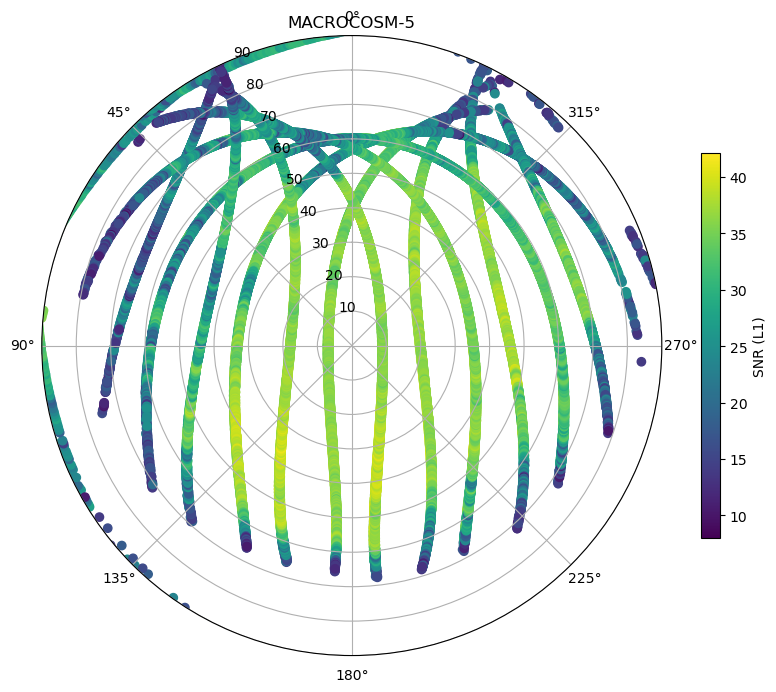

In [20]:
mySV='R20'
mystation_name='MACROCOSM-5'
fig,ax=plt.subplots(figsize=(10,10),subplot_kw=dict(projection='polar'))
subdf=df.xs(mySV,level='SV').xs(mystation_name,level='Station')
radius=90-subdf.Elevation
theta=np.deg2rad(subdf.Azimuth)
hs=ax.scatter(theta,radius,c=subdf.S1C)
ax.set_rlim([0,90])
ax.set_theta_zero_location("N")
plt.colorbar(hs,shrink=.5,label='SNR (L1)')
plt.title(mystation_name)

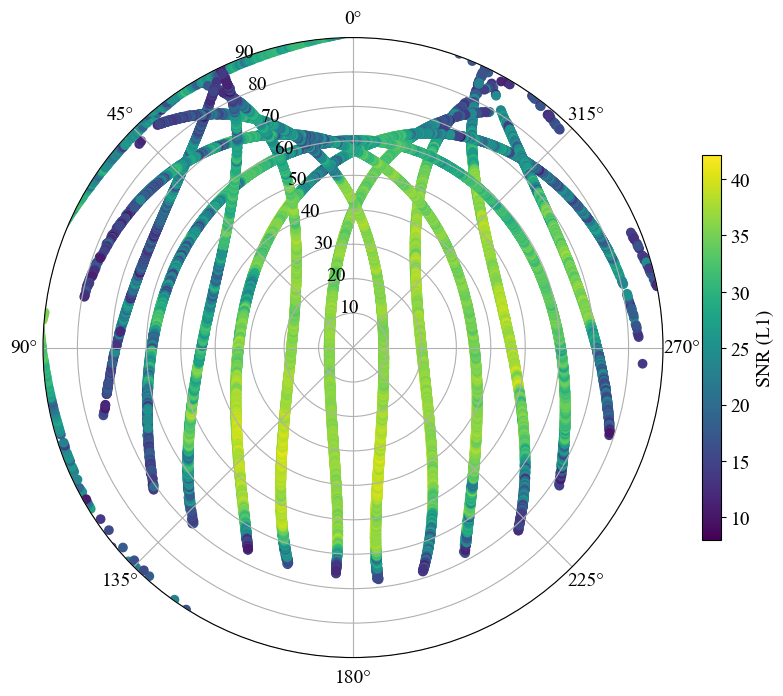

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Set global font to Times New Roman and label size to 14
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["axes.labelsize"] = 14
plt.rcParams["xtick.labelsize"] = 14
plt.rcParams["ytick.labelsize"] = 14
plt.rcParams["legend.fontsize"] = 14
plt.rcParams["figure.titlesize"] = 14
plt.rcParams["axes.titlesize"] = 14

# Your plot
mySV = 'R20'
mystation_name = 'MACROCOSM-5'

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='polar'))
subdf = df.xs(mySV, level='SV').xs(mystation_name, level='Station')
radius = 90 - subdf.Elevation
theta = np.deg2rad(subdf.Azimuth)

hs = ax.scatter(theta, radius, c=subdf.S1C)
ax.set_rlim([0, 90])
ax.set_theta_zero_location("N")

# Colorbar with label font size 14
cbar = plt.colorbar(hs, shrink=0.5)
cbar.set_label('SNR (L1)', fontsize=14)
cbar.ax.tick_params(labelsize=14)

# Title
#plt.title(mystation_name, fontsize=14)

#plt.tight_layout()
plt.show()


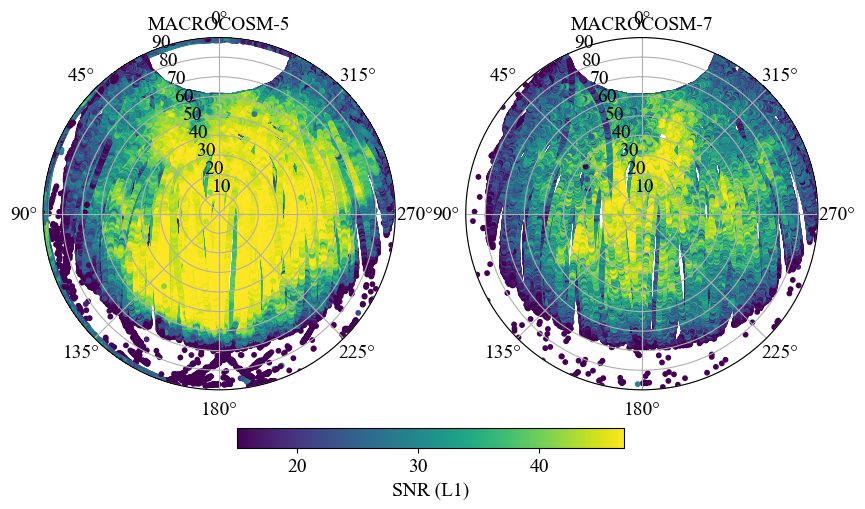

In [22]:
# get all sites as list
station_names = df.index.get_level_values('Station').unique()
# ensure we use the same color limits in all plots
clim = [15,47]
# initialize figure with polar axes
fig, ax = plt.subplots(1,len(station_names),figsize=(10,10),subplot_kw=dict(projection='polar'))
for i, iname in enumerate(station_names):
    # subset the dataset
    subdf = df.xs(iname,level='Station')
    # polar plots need a radius and theta direction in radians
    radius = 90-subdf.Elevation
    theta = np.deg2rad(subdf.Azimuth)
    # plot each measurement and color by signal to noise ratio
    hs = ax[i].scatter(theta,radius,c=subdf.S1C,s=10)
    hs.set_clim(clim)
    ax[i].set_rlim([0,90])
    ax[i].set_theta_zero_location("N")
    ax[i].set_title(iname)

plt.colorbar(hs, ax=ax, location='bottom', shrink=.5, pad=0.05, label='SNR (L1)')

Text(0.5, 1.0, 'R20')

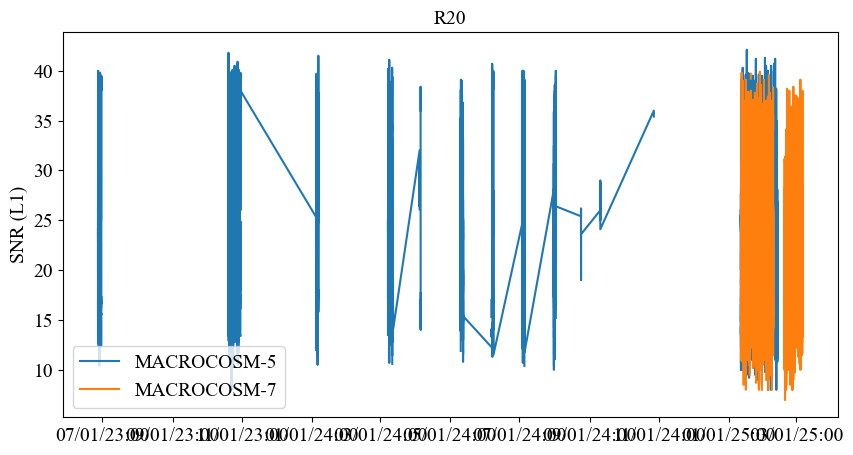

In [23]:
mySV = 'R20'
# get all sites as list
station_names = df.index.get_level_values('Station').unique()

fig, ax = plt.subplots(1,figsize=(10,5))
for i, iname in enumerate(station_names):
    # subset the dataset
    subdf = df.xs(iname,level='Station').xs(mySV,level='SV')
    # plot each measurement and color by signal to noise ratio
    hs = ax.plot(subdf.index.get_level_values('Epoch'),subdf.S1C,label=iname)
    
myFmt = mdates.DateFormatter('%D:%H')
ax.xaxis.set_major_formatter(myFmt)
ax.set_ylabel('SNR (L1)')
ax.legend()
plt.title(mySV)

for vod calc+plotting

In [24]:
hemi = gv.hemibuild(4)
hemi

In [25]:
hemi.grid

azi   ele      azimin      azimax  elemin  elemax
CellID                                                          
0         0.000000  90.0    0.000000  360.000000    88.0    90.0
1        22.500000  86.0    0.000000   45.000000    84.0    88.0
2        67.500000  86.0   45.000000   90.000000    84.0    88.0
3       112.500000  86.0   90.000000  135.000000    84.0    88.0
4       157.500000  86.0  135.000000  180.000000    84.0    88.0
...            ...   ...         ...         ...     ...     ...
1523    345.789474   6.0  344.210526  347.368421     4.0     8.0
1524    348.947368   6.0  347.368421  350.526316     4.0     8.0
1525    352.105263   6.0  350.526316  353.684211     4.0     8.0
1526    355.263158   6.0  353.684211  356.842105     4.0     8.0
1527    358.421053   6.0  356.842105  360.000000     4.0     8.0

[1528 rows x 6 columns]

In [26]:
# get patches
patches = hemi.patches() 
patches

CellID
0       Rectangle(xy=(0, 0), width=6.28319, height=2, ...
1       Rectangle(xy=(0, 2), width=0.785398, height=4,...
2       Rectangle(xy=(0.785398, 2), width=0.785398, he...
3       Rectangle(xy=(1.5708, 2), width=0.785398, heig...
4       Rectangle(xy=(2.35619, 2), width=0.785398, hei...
                              ...                        
1523    Rectangle(xy=(6.00761, 82), width=0.0551157, h...
1524    Rectangle(xy=(6.06272, 82), width=0.0551157, h...
1525    Rectangle(xy=(6.11784, 82), width=0.0551157, h...
1526    Rectangle(xy=(6.17295, 82), width=0.0551157, h...
1527    Rectangle(xy=(6.22807, 82), width=0.0551157, h...
Name: Patches, Length: 1528, dtype: object

In [27]:
newdf = hemi.add_CellID(df)
newdf

S1C   S1X   S2C   S2X  Azimuth  \
Station     Epoch               SV                                     
MACROCOSM-5 2023-05-08 12:18:30 C11   NaN   NaN   NaN   NaN   -162.3   
                                C12   NaN   NaN   NaN   NaN     58.2   
                                C24   NaN   NaN   NaN   NaN     46.2   
                                C34   NaN   NaN   NaN   NaN   -175.4   
                                E14   NaN  46.0   NaN   NaN   -109.8   
...                                   ...   ...   ...   ...      ...   
MACROCOSM-7 2025-03-06 17:33:30 G30  42.2   NaN   NaN  31.1    -80.6   
                                R11  35.1   NaN  37.5   NaN      1.8   
                                R12  24.0   NaN   NaN   NaN    -28.2   
                                R21  40.9   NaN  29.0   NaN     -5.5   
                                R22  37.9   NaN  35.5   NaN   -112.6   

                                     Elevation  CellID  
Station     Epoch               SV                      
MACROCOSM-5 2023-05-08 12:18:30 C11       52.0     389  
                                C12       67.1     127  
                                C24       54.3     290  
                                C34       74.4      65  
                                E14       68.7     108  
...                                        ...     ...  
MACROCOSM-7 2025-03-06 17:33:30 G30       53.7     333  
                                R11       59.4     221  
                                R12        5.9    1519  
                                R21       52.8     347  
                                R22       48.6     399  

[7364558 rows x 7 columns]

In [28]:
newdf12 = hemi.add_CellID(df12)
newdf12

S1C  S1X   S2C  S2X  Azimuth  Elevation  \
Station     Epoch               SV                                              
MACROCOSM-1 2023-01-10 19:07:30 C35   NaN  NaN   NaN  NaN     99.5       62.1   
                                G04  31.0  NaN   NaN  NaN    -76.2       58.1   
                                G08  41.3  NaN   NaN  NaN   -144.5       66.0   
                                G16  31.0  NaN   NaN  NaN     13.1       41.2   
                                G26  27.7  NaN   NaN  NaN     48.2       21.9   
...                                   ...  ...   ...  ...      ...        ...   
MACROCOSM-2 2025-02-03 13:12:00 R07  32.7  NaN  10.6  NaN    -31.0       43.9   
                                R09  30.0  NaN  22.1  NaN    -30.7       43.7   
                                R16  17.5  NaN  28.3  NaN     27.0       17.0   
            2025-02-03 13:12:30 G26  12.9  NaN   NaN  NaN    -15.2       63.9   
            2025-02-03 13:13:00 G26  11.7  NaN   NaN  NaN    -14.7       63.7   

                                     CellID  
Station     Epoch               SV           
MACROCOSM-1 2023-01-10 19:07:30 C35     181  
                                G04     269  
                                G08     148  
                                G16     506  
                                G26     989  
...                                     ...  
MACROCOSM-2 2025-02-03 13:12:00 R07     580  
                                R09     580  
                                R16    1089  
            2025-02-03 13:12:30 G26     218  
            2025-02-03 13:13:00 G26     218  

[13578807 rows x 7 columns]

In [29]:
newdf13 = hemi.add_CellID(df13)
newdf13

S1C  S1X   S2C  S2X  Azimuth  Elevation  \
Station     Epoch               SV                                              
MACROCOSM-1 2023-01-10 19:07:30 C35   NaN  NaN   NaN  NaN     99.5       62.1   
                                G04  31.0  NaN   NaN  NaN    -76.2       58.1   
                                G08  41.3  NaN   NaN  NaN   -144.5       66.0   
                                G16  31.0  NaN   NaN  NaN     13.1       41.2   
                                G26  27.7  NaN   NaN  NaN     48.2       21.9   
...                                   ...  ...   ...  ...      ...        ...   
MACROCOSM-3 2025-03-04 16:58:30 R09  34.0  NaN  31.0  NaN    -17.7       31.2   
                                R16  43.0  NaN  36.0  NaN     62.7       60.0   
                                R18  29.5  NaN  18.0  NaN     21.2       27.2   
                                R19  33.5  NaN  33.0  NaN     -6.0       68.8   
                                R20  31.0  NaN  33.0  NaN   -140.2       35.9   

                                     CellID  
Station     Epoch               SV           
MACROCOSM-1 2023-01-10 19:07:30 C35     181  
                                G04     269  
                                G08     148  
                                G16     506  
                                G26     989  
...                                     ...  
MACROCOSM-3 2025-03-04 16:58:30 R09     867  
                                R16     231  
                                R18     878  
                                R19     119  
                                R20     736  

[9386689 rows x 7 columns]

In [30]:
newdf17 = hemi.add_CellID(df17)
newdf17

S1C  S1X   S2C   S2X  Azimuth  \
Station     Epoch               SV                                    
MACROCOSM-1 2023-01-10 19:07:30 C35   NaN  NaN   NaN   NaN     99.5   
                                G04  31.0  NaN   NaN   NaN    -76.2   
                                G08  41.3  NaN   NaN   NaN   -144.5   
                                G16  31.0  NaN   NaN   NaN     13.1   
                                G26  27.7  NaN   NaN   NaN     48.2   
...                                   ...  ...   ...   ...      ...   
MACROCOSM-7 2025-03-06 17:33:30 G30  42.2  NaN   NaN  31.1    -80.6   
                                R11  35.1  NaN  37.5   NaN      1.8   
                                R12  24.0  NaN   NaN   NaN    -28.2   
                                R21  40.9  NaN  29.0   NaN     -5.5   
                                R22  37.9  NaN  35.5   NaN   -112.6   

                                     Elevation  CellID  
Station     Epoch               SV                      
MACROCOSM-1 2023-01-10 19:07:30 C35       62.1     181  
                                G04       58.1     269  
                                G08       66.0     148  
                                G16       41.2     506  
                                G26       21.9     989  
...                                        ...     ...  
MACROCOSM-7 2025-03-06 17:33:30 G30       53.7     333  
                                R11       59.4     221  
                                R12        5.9    1519  
                                R21       52.8     347  
                                R22       48.6     399  

[10876291 rows x 7 columns]

In [31]:
hemi_average = newdf.groupby(['CellID','Station']).mean()
hemi_average

S1C        S1X        S2C        S2X    Azimuth  \
CellID Station                                                              
0      MACROCOSM-5  47.144418  44.674016  41.143817  45.682927  18.579925   
       MACROCOSM-7  41.755076  41.578807  36.380967  38.827273  19.549298   
1      MACROCOSM-5  46.748479  45.072840  40.721951  45.089425  23.483020   
       MACROCOSM-7  44.082688  42.379070  37.305959  41.616644  21.484106   
2      MACROCOSM-5  46.397239  44.892324  41.169841  44.374689  65.992512   
...                       ...        ...        ...        ...        ...   
1523   MACROCOSM-5        NaN  25.483333        NaN        NaN -14.244444   
1524   MACROCOSM-5        NaN  25.580328        NaN        NaN -11.044444   
1525   MACROCOSM-5        NaN  27.587356        NaN        NaN  -7.761364   
1526   MACROCOSM-5        NaN  31.192174        NaN        NaN  -4.808696   
1527   MACROCOSM-5        NaN  34.715315        NaN        NaN  -1.566667   

                    Elevation  
CellID Station                 
0      MACROCOSM-5  88.635849  
       MACROCOSM-7  88.616260  
1      MACROCOSM-5  85.683922  
       MACROCOSM-7  85.816071  
2      MACROCOSM-5  86.018768  
...                       ...  
1523   MACROCOSM-5   5.300000  
1524   MACROCOSM-5   5.334921  
1525   MACROCOSM-5   5.221591  
1526   MACROCOSM-5   5.183478  
1527   MACROCOSM-5   5.296396  

[2866 rows x 6 columns]

In [32]:
hemi_average12 = newdf12.groupby(['CellID','Station']).mean()
hemi_average12

S1C        S1X        S2C        S2X    Azimuth  \
CellID Station                                                              
0      MACROCOSM-1  47.089294  44.719874  39.902189  43.644000   9.809890   
       MACROCOSM-2  40.007840  40.204092  33.809437  37.026761  25.346407   
1      MACROCOSM-1  46.216304  45.426253  39.584774  44.744385  27.165503   
       MACROCOSM-2  41.001619  39.697931  34.855080  39.414408  25.572313   
2      MACROCOSM-1  46.249375  45.264286  39.871915  45.773961  66.499148   
...                       ...        ...        ...        ...        ...   
1517   MACROCOSM-2  26.439157  24.592734  21.874395        NaN -33.370336   
1518   MACROCOSM-1  28.385487        NaN  24.514891        NaN -29.921361   
       MACROCOSM-2  24.997855        NaN  21.680996        NaN -30.019489   
1519   MACROCOSM-1  30.769653        NaN  24.920233        NaN -27.226227   
       MACROCOSM-2  25.385238        NaN  20.837747        NaN -27.252950   

                    Elevation  
CellID Station                 
0      MACROCOSM-1  88.609412  
       MACROCOSM-2  88.622674  
1      MACROCOSM-1  85.472073  
       MACROCOSM-2  85.567730  
2      MACROCOSM-1  85.847070  
...                       ...  
1517   MACROCOSM-2   6.556763  
1518   MACROCOSM-1   5.174069  
       MACROCOSM-2   5.156209  
1519   MACROCOSM-1   6.148340  
       MACROCOSM-2   6.142758  

[2896 rows x 6 columns]

In [33]:
hemi_average13 = newdf13.groupby(['CellID','Station']).mean()
hemi_average13

S1C        S1X        S2C        S2X    Azimuth  \
CellID Station                                                              
0      MACROCOSM-1  47.089294  44.719874  39.902189  43.644000   9.809890   
       MACROCOSM-3  43.551049  41.449110  35.415217  39.093137  28.154617   
1      MACROCOSM-1  46.216304  45.426253  39.584774  44.744385  27.165503   
       MACROCOSM-3  42.352281  40.926552  37.618673  40.512871  21.022689   
2      MACROCOSM-1  46.249375  45.264286  39.871915  45.773961  66.499148   
...                       ...        ...        ...        ...        ...   
1517   MACROCOSM-3  25.509868  23.797273  23.433333        NaN -33.391994   
1518   MACROCOSM-1  28.385487        NaN  24.514891        NaN -29.921361   
       MACROCOSM-3  25.305313        NaN  23.598061        NaN -29.979932   
1519   MACROCOSM-1  30.769653        NaN  24.920233        NaN -27.226227   
       MACROCOSM-3  27.022368        NaN  23.444615        NaN -27.167299   

                    Elevation  
CellID Station                 
0      MACROCOSM-1  88.609412  
       MACROCOSM-3  88.599077  
1      MACROCOSM-1  85.472073  
       MACROCOSM-3  85.818487  
2      MACROCOSM-1  85.847070  
...                       ...  
1517   MACROCOSM-3   6.591088  
1518   MACROCOSM-1   5.174069  
       MACROCOSM-3   5.250510  
1519   MACROCOSM-1   6.148340  
       MACROCOSM-3   6.173776  

[2850 rows x 6 columns]

In [34]:
hemi_average17 = newdf17.groupby(['CellID','Station']).mean()
hemi_average17

S1C        S1X        S2C        S2X    Azimuth  \
CellID Station                                                              
0      MACROCOSM-1  47.089294  44.719874  39.902189  43.644000   9.809890   
       MACROCOSM-7  41.755076  41.578807  36.380967  38.827273  19.549298   
1      MACROCOSM-1  46.216304  45.426253  39.584774  44.744385  27.165503   
       MACROCOSM-7  44.082688  42.379070  37.305959  41.616644  21.484106   
2      MACROCOSM-1  46.249375  45.264286  39.871915  45.773961  66.499148   
...                       ...        ...        ...        ...        ...   
1517   MACROCOSM-7  24.911572  24.690426  22.385086        NaN -33.340657   
1518   MACROCOSM-1  28.385487        NaN  24.514891        NaN -29.921361   
       MACROCOSM-7  23.651950        NaN  23.111429        NaN -29.901788   
1519   MACROCOSM-1  30.769653        NaN  24.920233        NaN -27.226227   
       MACROCOSM-7  24.221048        NaN  22.182739        NaN -27.172696   

                    Elevation  
CellID Station                 
0      MACROCOSM-1  88.609412  
       MACROCOSM-7  88.616260  
1      MACROCOSM-1  85.472073  
       MACROCOSM-7  85.816071  
2      MACROCOSM-1  85.847070  
...                       ...  
1517   MACROCOSM-7   6.579255  
1518   MACROCOSM-1   5.174069  
       MACROCOSM-7   5.181006  
1519   MACROCOSM-1   6.148340  
       MACROCOSM-7   6.159749  

[2860 rows x 6 columns]

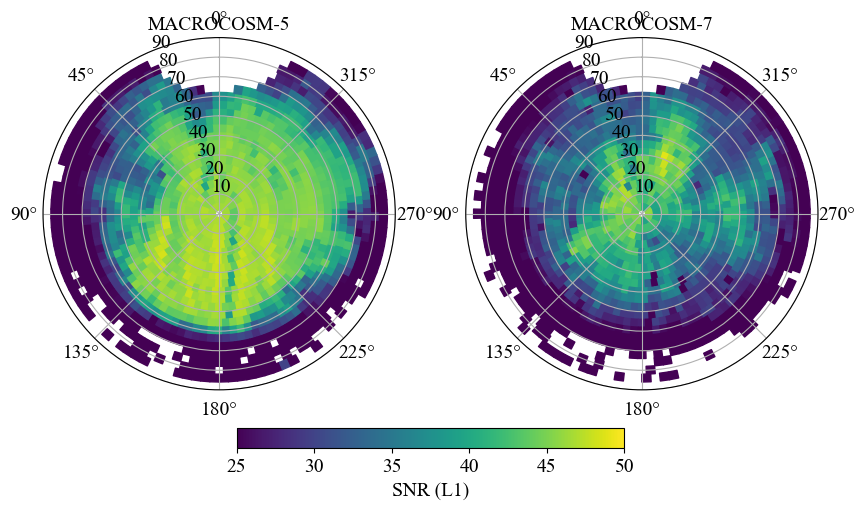

In [35]:
fig, ax = plt.subplots(1,2,figsize=(10,10),subplot_kw=dict(projection='polar'))

station_names = df.index.get_level_values('Station').unique()
for i, iname in enumerate(station_names):
    # associate the mean values to the patches, join inner will drop patches with no data, making plotting slightly faster
    ipatches = pd.concat([patches,hemi_average.xs(iname, level='Station')],join='inner',axis=1)
    # plotting with colored patches
    pc = PatchCollection(ipatches.Patches,array=ipatches.S1C,edgecolor='face', linewidth=1)
    pc.set_clim([25,50])
    ax[i].add_collection(pc)
    ax[i].set_rlim([0,90])
    ax[i].set_theta_zero_location("N")
    ax[i].set_title(iname)

plt.colorbar(pc, ax=ax, location='bottom', shrink=.5, pad=0.05, label='SNR (L1)')
#plt.savefig('figures/illustration_snr.png',facecolor='white', transparent=False,bbox_inches='tight')

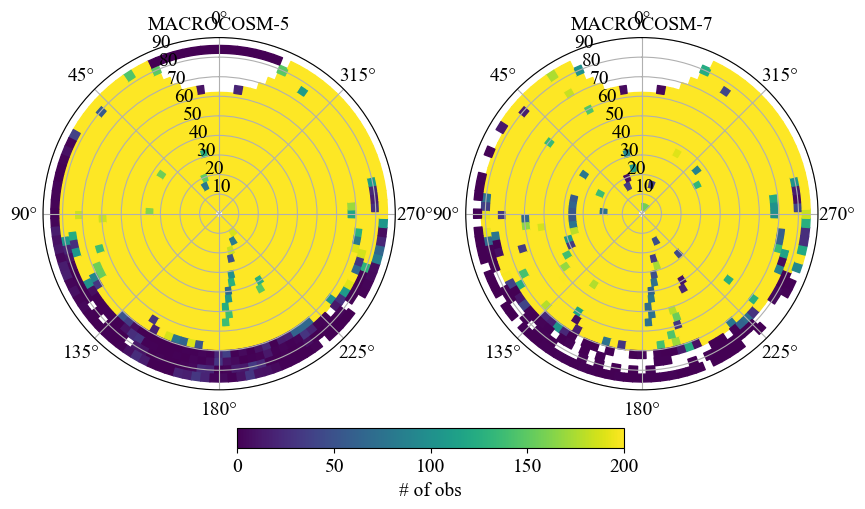

In [36]:
hemi_count = newdf.groupby(['CellID','Station']).count()
hemi_count

fig, ax = plt.subplots(1,2,figsize=(10,10),subplot_kw=dict(projection='polar'))

station_names = df.index.get_level_values('Station').unique()
for i, iname in enumerate(station_names):
    # associate the mean values to the patches, join inner will drop patches with no data, making plotting slightly faster
    ipatches = pd.concat([patches,hemi_count.xs(iname, level='Station')],join='inner',axis=1)
    # plotting with colored patches
    pc = PatchCollection(ipatches.Patches,array=ipatches.S1C,edgecolor='face', linewidth=1)
    pc.set_clim([0,200])
    ax[i].add_collection(pc)
    ax[i].set_rlim([0,90])
    ax[i].set_theta_zero_location("N")
    ax[i].set_title(iname)

plt.colorbar(pc, ax=ax, location='bottom', shrink=.5, pad=0.05, label='# of obs')

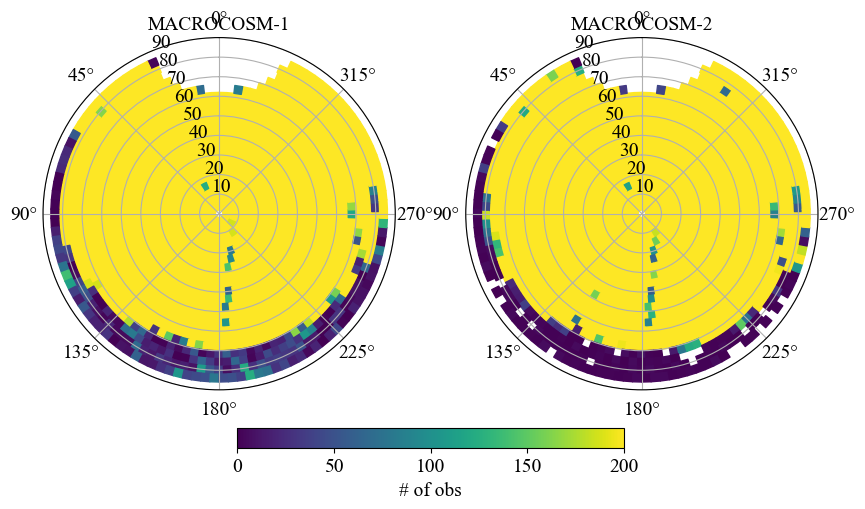

In [37]:
hemi_count12 = newdf12.groupby(['CellID','Station']).count()
hemi_count12

fig, ax = plt.subplots(1,2,figsize=(10,10),subplot_kw=dict(projection='polar'))

station_names = df12.index.get_level_values('Station').unique()
for i, iname in enumerate(station_names):
    # associate the mean values to the patches, join inner will drop patches with no data, making plotting slightly faster
    ipatches = pd.concat([patches,hemi_count12.xs(iname, level='Station')],join='inner',axis=1)
    # plotting with colored patches
    pc = PatchCollection(ipatches.Patches,array=ipatches.S1C,edgecolor='face', linewidth=1)
    pc.set_clim([0,200])
    ax[i].add_collection(pc)
    ax[i].set_rlim([0,90])
    ax[i].set_theta_zero_location("N")
    ax[i].set_title(iname)

plt.colorbar(pc, ax=ax, location='bottom', shrink=.5, pad=0.05, label='# of obs')

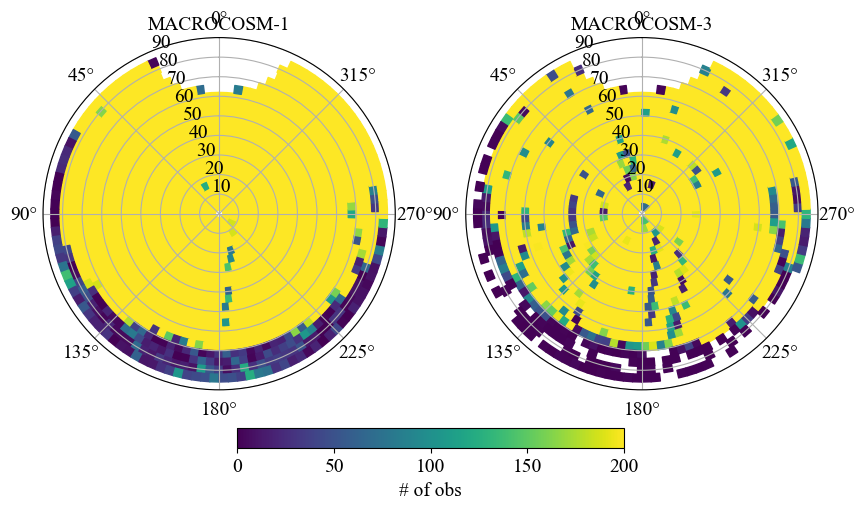

In [38]:
hemi_count13 = newdf13.groupby(['CellID','Station']).count()
hemi_count13

fig, ax = plt.subplots(1,2,figsize=(10,10),subplot_kw=dict(projection='polar'))

station_names = df13.index.get_level_values('Station').unique()
for i, iname in enumerate(station_names):
    # associate the mean values to the patches, join inner will drop patches with no data, making plotting slightly faster
    ipatches = pd.concat([patches,hemi_count13.xs(iname, level='Station')],join='inner',axis=1)
    # plotting with colored patches
    pc = PatchCollection(ipatches.Patches,array=ipatches.S1C,edgecolor='face', linewidth=1)
    pc.set_clim([0,200])
    ax[i].add_collection(pc)
    ax[i].set_rlim([0,90])
    ax[i].set_theta_zero_location("N")
    ax[i].set_title(iname)

plt.colorbar(pc, ax=ax, location='bottom', shrink=.5, pad=0.05, label='# of obs')

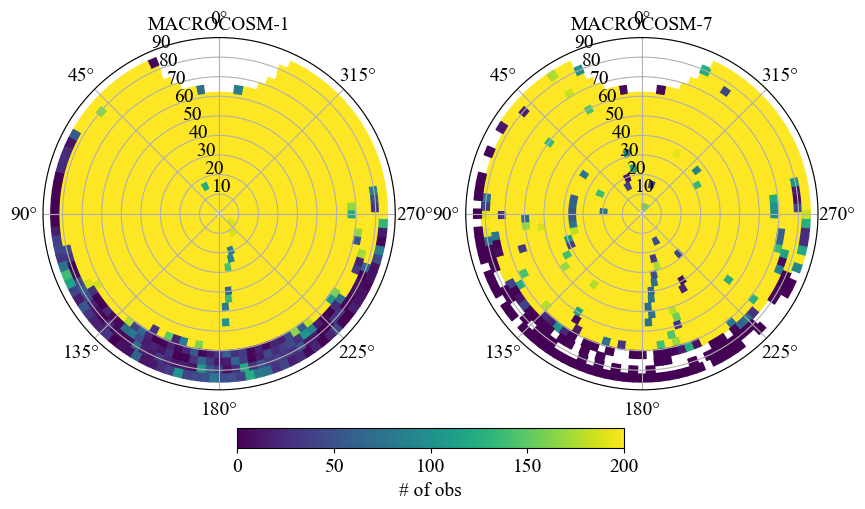

In [39]:
hemi_count17 = newdf17.groupby(['CellID','Station']).count()
hemi_count17

fig, ax = plt.subplots(1,2,figsize=(10,10),subplot_kw=dict(projection='polar'))

station_names = df17.index.get_level_values('Station').unique()
for i, iname in enumerate(station_names):
    # associate the mean values to the patches, join inner will drop patches with no data, making plotting slightly faster
    ipatches = pd.concat([patches,hemi_count17.xs(iname, level='Station')],join='inner',axis=1)
    # plotting with colored patches
    pc = PatchCollection(ipatches.Patches,array=ipatches.S1C,edgecolor='face', linewidth=1)
    pc.set_clim([0,200])
    ax[i].add_collection(pc)
    ax[i].set_rlim([0,90])
    ax[i].set_theta_zero_location("N")
    ax[i].set_title(iname)

plt.colorbar(pc, ax=ax, location='bottom', shrink=.5, pad=0.05, label='# of obs')

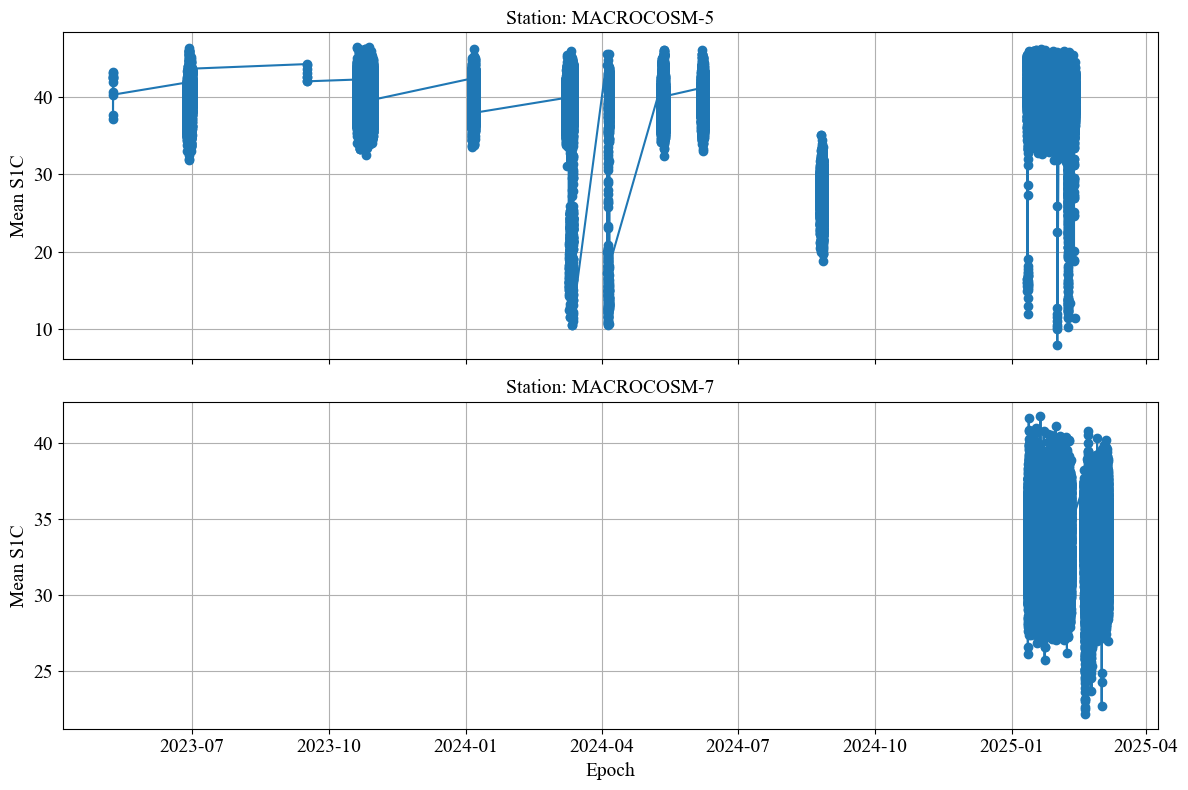

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Reset the index so 'Epoch' and 'Station' become columns
newdf = newdf.reset_index()

# Convert 'Epoch' to datetime format
newdf['Epoch'] = pd.to_datetime(newdf['Epoch'])

# Group newdf by Epoch and Station and compute the mean of S1C (adjust aggregation as needed)
ts_data = newdf.groupby(['Epoch', 'Station'])['S1C'].mean().reset_index()

# Get unique station names for plotting
station_names = ts_data['Station'].unique()
n_stations = len(station_names)

# Create a subplot for each station
fig, axes = plt.subplots(n_stations, 1, figsize=(12, 4 * n_stations), sharex=True)
if n_stations == 1:
    axes = [axes]  # Ensure axes is iterable if only one station

# Plot the time series for each station
for ax, station in zip(axes, station_names):
    station_data = ts_data[ts_data['Station'] == station]
    ax.plot(station_data['Epoch'], station_data['S1C'], marker='o', linestyle='-')
    ax.set_title(f"Station: {station}")
    ax.set_ylabel("Mean S1C")
    ax.grid(True)

plt.xlabel("Epoch")
plt.tight_layout()
plt.show()



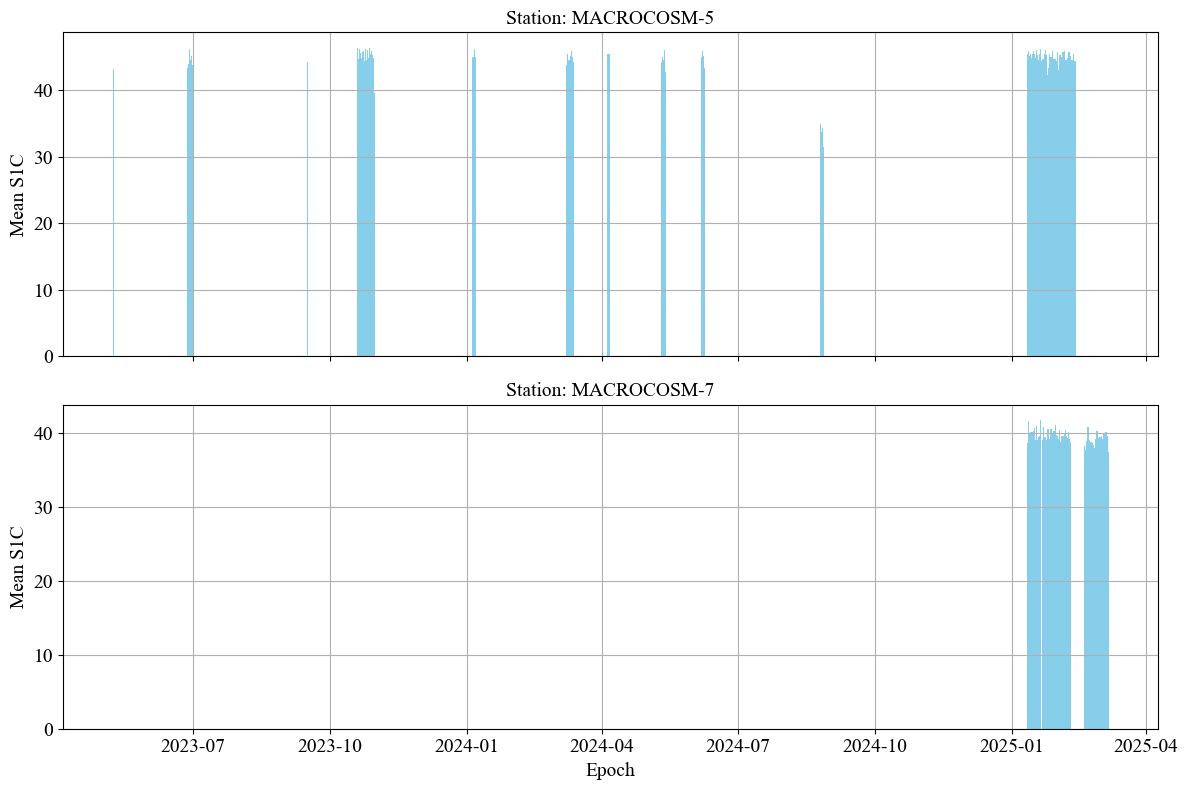

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# If 'Epoch' is not already a column, reset the index so that 'Epoch' and 'Station' become columns.
if 'Epoch' not in newdf.columns:
    newdf = newdf.reset_index()

# If an extra column "level_0" exists, drop it.
if 'level_0' in newdf.columns:
    newdf = newdf.drop(columns=['level_0'])

# Convert 'Epoch' to datetime format
newdf['Epoch'] = pd.to_datetime(newdf['Epoch'])

# Group newdf by Epoch and Station and compute the mean of S1C
ts_data = newdf.groupby(['Epoch', 'Station'])['S1C'].mean().reset_index()

# Get unique station names for plotting
station_names = ts_data['Station'].unique()
n_stations = len(station_names)

# Create a subplot for each station
fig, axes = plt.subplots(n_stations, 1, figsize=(12, 4 * n_stations), sharex=True)
if n_stations == 1:
    axes = [axes]  # Ensure axes is iterable if only one station

# Plot the time series as a bar chart for each station
for ax, station in zip(axes, station_names):
    station_data = ts_data[ts_data['Station'] == station]
    ax.bar(station_data['Epoch'], station_data['S1C'], color='skyblue')
    ax.set_title(f"Station: {station}")
    ax.set_ylabel("Mean S1C")
    ax.grid(True)

plt.xlabel("Epoch")
plt.tight_layout()
plt.show()


In [42]:
import os
print(os.getcwd())


/Volumes/coraldelmar


In [43]:
# set which data files should be loaded
pattern = '/Volumes/coraldelmar/march_collection/MACROCOSM-1.2/*.nc'
# define how to associate stations together. Always put reference station first.
pairings={'MACROCOSM-1.2':('MACROCOSM-1','MACROCOSM-2')}
# define if some observables with similar frequencies should be combined together. In the future, this should be replaced by the selection of frequency bands.
bands = {'VOD1':['S1','S1X','S1C'],'VOD2':['S2','S2X','S2C']}

vod12 = gv.calc_vod(pattern,pairings,bands)
vod12 = vod12['MACROCOSM-1.2']
vod12
vod12.to_csv('/Volumes/coraldelmar/march_collection/MACROCOSM-1.2/vod_MACROCOSM-1.2.csv', index=False)


In [44]:
# set which data files should be loaded
pattern = '/Volumes/coraldelmar/march_collection/MACROCOSM-1.7/*.nc'
# define how to associate stations together. Always put reference station first.
pairings={'MACROCOSM-1.7':('MACROCOSM-1','MACROCOSM-7')}
# define if some observables with similar frequencies should be combined together. In the future, this should be replaced by the selection of frequency bands.
bands = {'VOD1':['S1','S1X','S1C'],'VOD2':['S2','S2X','S2C']}

vod17 = gv.calc_vod(pattern,pairings,bands)
vod17 = vod17['MACROCOSM-1.7']
vod17
vod17.to_csv('/Volumes/coraldelmar/march_collection/MACROCOSM-1.7/vod_MACROCOSM-1.7.csv', index=False)


In [45]:
# set which data files should be loaded
pattern = '/Volumes/coraldelmar/march_collection/MACROCOSM-1.3/*.nc'
# define how to associate stations together. Always put reference station first.
pairings={'MACROCOSM-1.3':('MACROCOSM-1','MACROCOSM-3')}
# define if some observables with similar frequencies should be combined together. In the future, this should be replaced by the selection of frequency bands.
bands = {'VOD1':['S1','S1X','S1C'],'VOD2':['S2','S2X','S2C']}

vod13 = gv.calc_vod(pattern,pairings,bands)
vod13 = vod13['MACROCOSM-1.3']
vod13
vod13.to_csv('/Volumes/coraldelmar/march_collection/MACROCOSM-1.3/vod_MACROCOSM-1.3.csv', index=False)


In [46]:
# set which data files should be loaded
pattern = '/Volumes/coraldelmar/march_collection/MACROCOSM-5.7/*.nc'
# define how to associate stations together. Always put reference station first.
pairings={'MACROCOSM-5.7':('MACROCOSM-5','MACROCOSM-7')}
# define if some observables with similar frequencies should be combined together. In the future, this should be replaced by the selection of frequency bands.
bands = {'VOD1':['S1','S1X','S1C'],'VOD2':['S2','S2X','S2C']}

vod = gv.calc_vod(pattern,pairings,bands)
vod = vod['MACROCOSM-5.7']
vod
vod.to_csv('/Volumes/coraldelmar/march_collection/MACROCOSM-5.7/vod_MACROCOSM-5.7.csv', index=False)


In [47]:
# intialize hemispheric grid
hemi = gv.hemibuild(2)
# get patches for plotting later
patches = hemi.patches()
# classify vod into grid cells, drop azimuth and elevation afterwards as we don't need it anymore
vod = hemi.add_CellID(vod)
# get average value per grid cell
vod_avg = vod.groupby(['CellID']).agg(['mean', 'std', 'count'])
# flatten the columns
vod_avg.columns = ["_".join(x) for x in vod_avg.columns.to_flat_index()]
vod_avg

VOD1_mean  VOD1_std  VOD1_count  VOD2_mean  VOD2_std  VOD2_count  \
CellID                                                                     
0        0.408727  0.541779         113   1.618940  0.621533          38   
1        0.540750  0.412350         239   0.534208  0.295038         154   
2        0.470519  0.379247         351   0.510294  0.320942         315   
3        0.258489  0.557626         356   0.110798  0.566197         317   
4        0.706450  0.516893         157   1.056873  0.458911          73   
...           ...       ...         ...        ...       ...         ...   
6427    -0.008899  0.047026          12  -0.003968  0.064805           7   
6428     0.000083  0.032931         109   0.021385  0.033318          25   
6429    -0.004049  0.044315         400  -0.010718  0.067294          27   
6430    -0.004145  0.037874          87  -0.007352  0.056221           8   
6431     0.005315  0.040641         176  -0.012359  0.059155           7   

        Azimuth_mean  Azimuth_std  Azimuth_count  Elevation_mean  \
CellID                                                             
0          12.680749   100.326416            187       89.344920   
1          26.513898    12.258144            295       87.746780   
2          66.796560    13.104167            407       87.825553   
3         112.148551    11.961805            414       87.719324   
4         156.940976    13.059610            205       87.861951   
...              ...          ...            ...             ...   
6427      -31.866667     0.235028             15        2.613333   
6428      -30.291057     0.398976            123        1.875610   
6429      -29.013744     0.438417            422        2.213270   
6430      -27.533333     0.458296             96        1.921875   
6431      -26.123469     0.312574            196        2.179592   

        Elevation_std  Elevation_count  
CellID                                  
0            0.198958              187  
1            0.555169              295  
2            0.358755              407  
3            0.401527              414  
4            0.583949              205  
...               ...              ...  
6427         0.232584               15  
6428         0.526875              123  
6429         0.539036              422  
6430         0.586552               96  
6431         0.547340              196  

[5180 rows x 12 columns]

In [48]:
# intialize hemispheric grid
hemi = gv.hemibuild(2)
# get patches for plotting later
patches = hemi.patches()
# classify vod into grid cells, drop azimuth and elevation afterwards as we don't need it anymore
vod12 = hemi.add_CellID(vod12)
# get average value per grid cell
vod_avg12 = vod12.groupby(['CellID']).agg(['mean', 'std', 'count'])
# flatten the columns
vod_avg12.columns = ["_".join(x) for x in vod_avg12.columns.to_flat_index()]
vod_avg12

VOD1_mean  VOD1_std  VOD1_count  VOD2_mean  VOD2_std  VOD2_count  \
CellID                                                                     
0       -0.345404  3.160544          33   1.003869  0.754650          15   
1        0.871012  1.430479         110   0.949895  0.585041          55   
2        1.284252  1.660478         183   1.175479  0.534872         114   
3        1.179071  1.902648         193   1.440767  0.937677         124   
4        1.332963  0.671887          93   1.490664  1.167553          50   
...           ...       ...         ...        ...       ...         ...   
6427    -0.013980  0.023783           4   0.003929  0.018536           5   
6428     0.012814  0.042392         112  -0.004012  0.053515          17   
6429     0.061729  0.254011         352   0.286363  0.621592          60   
6430     0.008772  0.039076         112   0.014615  0.046090          22   
6431     0.023110  0.046946         122   0.063861  0.036140           8   

        Azimuth_mean  Azimuth_std  Azimuth_count  Elevation_mean  \
CellID                                                             
0           6.854348   106.462947             46       89.371739   
1          28.311538    12.735872            130       87.735385   
2          66.479798    12.899825            198       87.899495   
3         112.609223    13.065518            206       87.830097   
4         149.924752    10.591293            101       87.767327   
...              ...          ...            ...             ...   
6427      -31.733333     0.165831              9        2.800000   
6428      -30.216807     0.289745            119        2.003361   
6429      -29.153591     0.422892            362        2.096409   
6430      -27.444828     0.463136            116        1.989655   
6431      -26.315504     0.250140            129        2.084496   

        Elevation_std  Elevation_count  
CellID                                  
0            0.242820               46  
1            0.522496              130  
2            0.483903              198  
3            0.511399              206  
4            0.488899              101  
...               ...              ...  
6427         0.141421                9  
6428         0.593458              119  
6429         0.575697              362  
6430         0.549843              116  
6431         0.574925              129  

[5285 rows x 12 columns]

In [49]:
# intialize hemispheric grid
hemi = gv.hemibuild(2)
# get patches for plotting later
patches = hemi.patches()
# classify vod into grid cells, drop azimuth and elevation afterwards as we don't need it anymore
vod13 = hemi.add_CellID(vod13)
# get average value per grid cell
vod_avg13 = vod13.groupby(['CellID']).agg(['mean', 'std', 'count'])
# flatten the columns
vod_avg13.columns = ["_".join(x) for x in vod_avg13.columns.to_flat_index()]
vod_avg13

MergeError: Not allowed to merge between different levels. (1 levels on the left, 2 on the right)

In [ ]:
# intialize hemispheric grid
hemi = gv.hemibuild(2)
# get patches for plotting later
patches = hemi.patches()
# classify vod into grid cells, drop azimuth and elevation afterwards as we don't need it anymore
vod17 = hemi.add_CellID(vod17)
# get average value per grid cell
vod_avg17 = vod17.groupby(['CellID']).agg(['mean', 'std', 'count'])
# flatten the columns
vod_avg17.columns = ["_".join(x) for x in vod_avg17.columns.to_flat_index()]
vod_avg17

In [ ]:
from matplotlib import rcParams, pyplot as plt
from matplotlib.collections import PatchCollection
import pandas as pd

# Font settings
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Times New Roman']

# Set up the figure (single polar plot)
fig, ax = plt.subplots(figsize=(8, 7), subplot_kw=dict(projection='polar'))

# Plot VOD1_count
iname = 'VOD1'
ipatches = pd.concat([patches, vod_avg[f"{iname}_count"]], join='inner', axis=1)
pc = PatchCollection(ipatches.Patches, array=ipatches[f"{iname}_count"],
                     edgecolor='face', linewidth=1)
pc.set_clim([0, vod_avg[f"{iname}_count"].max()])  # Optional: clamp color scale
ax.add_collection(pc)
ax.set_rlim([0, 90])
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
ax.set_title(f"{iname} Count")

plt.colorbar(pc, ax=ax, location='bottom', shrink=.7, pad=0.1, label='Sample Count')
plt.tight_layout()
plt.show()


In [ ]:
from matplotlib import rcParams, pyplot as plt
from matplotlib.collections import PatchCollection
import pandas as pd

# Font settings
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Times New Roman']

# Set up the figure (single polar plot)
fig, ax = plt.subplots(figsize=(8, 7), subplot_kw=dict(projection='polar'))

# Plot VOD1_count
iname = 'VOD1'
ipatches = pd.concat([patches, vod_avg17[f"{iname}_count"]], join='inner', axis=1)
pc = PatchCollection(ipatches.Patches, array=ipatches[f"{iname}_count"],
                     edgecolor='face', linewidth=1)
pc.set_clim([0, vod_avg[f"{iname}_count"].max()])  # Optional: clamp color scale
ax.add_collection(pc)
ax.set_rlim([0, 90])
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
ax.set_title(f"{iname} Count")

plt.colorbar(pc, ax=ax, location='bottom', shrink=.7, pad=0.1, label='Sample Count')
plt.tight_layout()
plt.show()


In [ ]:
from matplotlib import rcParams, pyplot as plt
from matplotlib.collections import PatchCollection
import pandas as pd

# Font settings
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Times New Roman']

# Set up the figure (single polar plot)
fig, ax = plt.subplots(figsize=(8, 7), subplot_kw=dict(projection='polar'))

# Plot VOD1_count
iname = 'VOD1'
ipatches = pd.concat([patches, vod_avg12[f"{iname}_count"]], join='inner', axis=1)
pc = PatchCollection(ipatches.Patches, array=ipatches[f"{iname}_count"],
                     edgecolor='face', linewidth=1)
pc.set_clim([0, vod_avg[f"{iname}_count"].max()])  # Optional: clamp color scale
ax.add_collection(pc)
ax.set_rlim([0, 90])
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
ax.set_title(f"{iname} Count")

plt.colorbar(pc, ax=ax, location='bottom', shrink=.7, pad=0.1, label='Sample Count')
plt.tight_layout()
plt.show()


In [ ]:

# Font settings
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman']

# Create a single polar plot
fig, ax = plt.subplots(figsize=(10,10), subplot_kw={'projection': 'polar'})

vod_names = ['VOD1']
for iname in vod_names:
    # Associate mean values to the patches
    ipatches = pd.concat([patches, vod_avg[f"{iname}_mean"]], join='inner', axis=1)
    
    # Create PatchCollection
    pc = PatchCollection(ipatches.Patches, array=ipatches[f"{iname}_mean"], edgecolor='face', linewidth=1)
    pc.set_clim([-0.1, 3])
    
    # Add to the single polar axis
    ax.add_collection(pc)
    ax.set_rlim([0, 90])
    ax.set_theta_zero_location("N")
    ax.set_theta_direction(-1)
    #ax.set_title(iname)

# Add colorbar
plt.colorbar(pc, ax=ax, location='bottom', shrink=0.5, pad=0.05, label='GNSS-VOD')

plt.show()


In [ ]:

# Font settings
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman']

# Create a single polar plot
fig, ax = plt.subplots(figsize=(10,10), subplot_kw={'projection': 'polar'})

vod_names = ['VOD1']
for iname in vod_names:
    # Associate mean values to the patches
    ipatches = pd.concat([patches, vod_avg12[f"{iname}_mean"]], join='inner', axis=1)
    
    # Create PatchCollection
    pc = PatchCollection(ipatches.Patches, array=ipatches[f"{iname}_mean"], edgecolor='face', linewidth=1)
    pc.set_clim([-0.1, 3])
    
    # Add to the single polar axis
    ax.add_collection(pc)
    ax.set_rlim([0, 90])
    ax.set_theta_zero_location("N")
    ax.set_theta_direction(-1)
    #ax.set_title(iname)

# Add colorbar
plt.colorbar(pc, ax=ax, location='bottom', shrink=0.5, pad=0.05, label='VOD obs')

plt.show()


In [ ]:

# Font settings
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman']

# Create a single polar plot
fig, ax = plt.subplots(figsize=(10,10), subplot_kw={'projection': 'polar'})

vod_names = ['VOD1']
for iname in vod_names:
    # Associate mean values to the patches
    ipatches = pd.concat([patches, vod_avg17[f"{iname}_mean"]], join='inner', axis=1)
    
    # Create PatchCollection
    pc = PatchCollection(ipatches.Patches, array=ipatches[f"{iname}_mean"], edgecolor='face', linewidth=1)
    pc.set_clim([-0.1, 3])
    
    # Add to the single polar axis
    ax.add_collection(pc)
    ax.set_rlim([0, 90])
    ax.set_theta_zero_location("N")
    ax.set_theta_direction(-1)
    #ax.set_title(iname)

# Add colorbar
plt.colorbar(pc, ax=ax, location='bottom', shrink=0.5, pad=0.05, label='VOD obs')

plt.show()


In [ ]:
fig, ax = plt.subplots(1,2,figsize=(17,14),subplot_kw=dict(projection='polar'))

vod_names = ['VOD1','VOD2']
for i, iname in enumerate(vod_names):
    # associate the mean values to the patches, join inner will drop patches with no data, making plotting slightly faster
    ipatches = pd.concat([patches,vod_avg[f"{iname}_mean"]],join='inner',axis=1)
    # plotting with colored patches
    pc = PatchCollection(ipatches.Patches,array=ipatches[f"{iname}_mean"],edgecolor='face', linewidth=1)
    pc.set_clim([-0.1,3])
    ax[i].add_collection(pc)
    ax[i].set_rlim([0,90])
    ax[i].set_theta_zero_location("N")
    ax[i].set_theta_direction(-1)
    ax[i].set_title(iname)

plt.colorbar(pc, ax=ax, location='bottom', shrink=.5, pad=0.05, label='GNSS-VOD')

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(17,14),subplot_kw=dict(projection='polar'))

vod_names = ['VOD1','VOD2']
for i, iname in enumerate(vod_names):
    # associate the mean values to the patches, join inner will drop patches with no data, making plotting slightly faster
    ivod_data = vod_avg[f"{iname}_mean"].where(vod_avg[f"{iname}_count"]>40)
    ipatches = pd.concat([patches,ivod_data],join='inner',axis=1)
    # plotting with colored patches
    pc = PatchCollection(ipatches.Patches,array=ipatches[f"{iname}_mean"],edgecolor='face', linewidth=1)
    pc.set_clim([-0.1,3])
    ax[i].add_collection(pc)
    ax[i].set_rlim([0,90])
    ax[i].set_theta_zero_location("N")
    ax[i].set_theta_direction(-1)
    ax[i].set_title(iname)

plt.colorbar(pc, ax=ax, location='bottom', shrink=.5, pad=0.05, label='GNSS-VOD')

In [ ]:
# merge statistics with the original VOD measurements
vod_anom = vod.join(vod_avg,on='CellID')
vod_anom=vod_anom.reset_index()
vod_anom.to_csv('/Volumes/coraldelmar/march_collection/MACROCOSM-5.7/vod_anom.csv', index=False)

In [ ]:
# merge statistics with the original VOD measurements
vod_anom12 = vod12.join(vod_avg12,on='CellID')
vod_anom12=vod_anom12.reset_index()
vod_anom12.to_csv('/Volumes/coraldelmar/march_collection/MACROCOSM-1.2/vod_anom12.csv', index=False)

In [ ]:
# merge statistics with the original VOD measurements
vod_anom13 = vod13.join(vod_avg13,on='CellID')
vod_anom13

In [ ]:
# merge statistics with the original VOD measurements
vod_anom17 = vod17.join(vod_avg17,on='CellID')
vod_anom17=vod_anom17.reset_index()
vod_anom17.to_csv('/Volumes/coraldelmar/march_collection/MACROCOSM-1.7/vod_anom17.csv', index=False)

In [ ]:
vod_anom['VOD1_anom'] = vod_anom['VOD1']-vod_anom['VOD1_mean']
vod_anom['VOD2_anom'] = vod_anom['VOD2']-vod_anom['VOD2_mean']

In [ ]:
vod_anom12['VOD1_anom'] = vod_anom12['VOD1']-vod_anom12['VOD1_mean']
vod_anom12['VOD2_anom'] = vod_anom12['VOD2']-vod_anom12['VOD2_mean']

In [ ]:
vod_anom13['VOD1_anom'] = vod_anom13['VOD1']-vod_anom13['VOD1_mean']
vod_anom13['VOD2_anom'] = vod_anom13['VOD2']-vod_anom13['VOD2_mean']

In [ ]:
vod_anom17['VOD1_anom'] = vod_anom17['VOD1']-vod_anom17['VOD1_mean']
vod_anom17['VOD2_anom'] = vod_anom17['VOD2']-vod_anom17['VOD2_mean']

In [ ]:
vod_ts = vod_anom.groupby(pd.Grouper(freq='1h', level='Epoch')).mean()
vod_ts

In [ ]:
vod_ts12 = vod_anom12.groupby(pd.Grouper(freq='1h', level='Epoch')).mean()
vod_ts12

In [ ]:
vod_ts13 = vod_anom13.groupby(pd.Grouper(freq='1h', level='Epoch')).mean()
vod_ts13

In [ ]:
vod_ts17 = vod_anom17.groupby(pd.Grouper(freq='1h', level='Epoch')).mean()
vod_ts17
vod_ts17.to_csv('/Volumes/coraldelmar/march_collection/MACROCOSM-1.7/vod_ts17.csv', index=False)

In [ ]:
vod_ts['VOD1_anom'] = vod_ts['VOD1_anom']+vod_ts['VOD1'].mean()
vod_ts['VOD2_anom'] = vod_ts['VOD2_anom']+vod_ts['VOD2'].mean()

In [ ]:
vod_ts12['VOD1_anom'] = vod_ts12['VOD1_anom']+vod_ts12['VOD1'].mean()
vod_ts12['VOD2_anom'] = vod_ts12['VOD2_anom']+vod_ts12['VOD2'].mean()

In [ ]:
vod_ts13['VOD1_anom'] = vod_ts13['VOD1_anom']+vod_ts13['VOD1'].mean()
vod_ts13['VOD2_anom'] = vod_ts13['VOD2_anom']+vod_ts13['VOD2'].mean()

In [ ]:
vod_ts17['VOD1_anom'] = vod_ts17['VOD1_anom']+vod_ts17['VOD1'].mean()
vod_ts17['VOD2_anom'] = vod_ts17['VOD2_anom']+vod_ts17['VOD2'].mean()

In [ ]:
vod_names = ['VOD1','VOD1_anom']

fig, ax = plt.subplots(1,figsize=(10,5))
for i, iname in enumerate(vod_names): 
    # plot each measurement and color by signal to noise ratio
    hs = ax.plot(vod_ts.index.get_level_values('Epoch'),vod_ts[iname],label=iname)
    
myFmt = mdates.DateFormatter('%d-%b')
ax.xaxis.set_major_formatter(myFmt)
ax.set_ylabel('GNSS-VOD (L1)')
ax.legend()
plt.title('GNSS-VOD at LUQ-PR, January 2025')
#plt.savefig('figures/illustration_vod.png',facecolor='white', transparent=False,bbox_inches='tight')


In [ ]:
#VOD Diurnal Cycle

#font changing
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Times New Roman']

#
vod_reset = vod.reset_index()
#vod_reset['Epoch']=vod_reset['Epoch']+datetime.timedelta(hours=-5)
vod_reset['Epoch'] = pd.to_datetime(vod_reset['Epoch'])
#.tz_convert('UTC-05')
vod_reset['Epoch']=vod_reset['Epoch']+timedelta(hours=-5) # local PR time
vod_reset.set_index('Epoch', inplace=True)
vod_numeric = vod_reset[['VOD1', 'VOD2']].apply(pd.to_numeric, errors='coerce').interpolate()
vod_hourly_mean = vod_numeric.resample('H').mean()

# plotting
plt.figure(figsize=(10, 6))
plt.plot(vod_hourly_mean.index, vod_hourly_mean['VOD1'], label='VOD1')
plt.plot(vod_hourly_mean.index, vod_hourly_mean['VOD2'], label='VOD2')
plt.xlabel('Time', fontsize=14)
plt.ylabel('Average VOD', fontsize=14)
plt.title('Time Series Diurnal Cycle of VOD1 and VOD2', fontsize=16)
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#subsetting for areas with more or less vegetation based on azimuth and elevation
# Subset the vod_avg dataframe based on the specified azimuth and elevation ranges

vod_anom_subset_moreveg = vod_anom[
    (vod_anom['Azimuth_mean'] >= 120) & (vod_anom['Azimuth_mean'] <= 150) &
    (vod_anom['Elevation_mean'] >= 20) & (vod_anom['Elevation_mean'] <= 40)
]

vod_anom_subset_moreveg.head()
#
vod_anom_subset_lessveg = vod_anom[
    ((vod_anom['Azimuth_mean'] >= 30) & (vod_anom['Azimuth_mean'] <= 40) &
     (vod_anom['Elevation_mean'] >= 50) & (vod_anom['Elevation_mean'] <= 60)) 
]

vod_anom_subset_lessveg.head()

In [ ]:
 #more vegetation condition
moreveg_mask = (
    (vod_anom17['Elevation_mean'] > 20) &
    (
        ((vod_anom17['Azimuth_mean'] >= 310) & (vod_anom17['Azimuth_mean'] <= 315)) |
        ((vod_anom17['Azimuth_mean'] >= 60) & (vod_anom17['Azimuth_mean'] <= 110))
    )
)

# Apply the mask
vod_anom_subset_moreveg17 = vod_anom17[moreveg_mask]
vod_anom_subset_lessveg17 = vod_anom17[~moreveg_mask] 

# Preview
vod_anom_subset_moreveg17.head()
vod_anom_subset_lessveg17.head()


In [ ]:
#subsetting for areas with more or less vegetation based on azimuth and elevation
# Subset the vod_avg dataframe based on the specified azimuth and elevation ranges

vod_anom_subset_moreveg13 = vod_anom13[
    (vod_anom13['Azimuth_mean'] >= 120) & (vod_anom13['Azimuth_mean'] <= 150) &
    (vod_anom13['Elevation_mean'] >= 20) & (vod_anom13['Elevation_mean'] <= 40)
]

vod_anom_subset_moreveg13.head()
#
vod_anom_subset_lessveg13 = vod_anom13[
    ((vod_anom13['Azimuth_mean'] >= 30) & (vod_anom13['Azimuth_mean'] <= 40) &
     (vod_anom13['Elevation_mean'] >= 50) & (vod_anom13['Elevation_mean'] <= 60)) 
]

vod_anom_subset_lessveg13.head()

In [ ]:
# More vegetation: elevation ≤ 60
vod_anom_subset_moreveg12 = vod_anom12[vod_anom12['Elevation_mean'] <= 60]

# Less vegetation: elevation > 60
vod_anom_subset_lessveg12 = vod_anom12[vod_anom12['Elevation_mean'] > 60]

# 
vod_anom_subset_moreveg12.head()
vod_anom_subset_lessveg12.head()



In [ ]:

#diurnal cycle of VOD1- more v less veg
#reset index
vod_anom_subset_moreveg_reset = vod_anom_subset_moreveg.reset_index()
vod_anom_subset_lessveg_reset = vod_anom_subset_lessveg.reset_index()
#epoch to date time
vod_anom_subset_moreveg_reset['Epoch'] = pd.to_datetime(vod_anom_subset_moreveg_reset['Epoch'])
vod_anom_subset_lessveg_reset['Epoch'] = pd.to_datetime(vod_anom_subset_lessveg_reset['Epoch'])
#local hr
vod_anom_subset_moreveg_reset['Epoch'] = vod_anom_subset_moreveg_reset['Epoch'] + timedelta(hours=-5)
vod_anom_subset_lessveg_reset['Epoch'] = vod_anom_subset_lessveg_reset['Epoch'] + timedelta(hours=-5)
#reset index
vod_anom_subset_moreveg_reset.set_index('Epoch', inplace=True)
vod_anom_subset_lessveg_reset.set_index('Epoch', inplace=True)
#numeric values
vod_numeric_moreveg = vod_anom_subset_moreveg_reset[['VOD1_mean']].apply(pd.to_numeric, errors='coerce').interpolate()
vod_numeric_lessveg = vod_anom_subset_lessveg_reset[['VOD1_mean']].apply(pd.to_numeric, errors='coerce').interpolate()
#hourly avg resampling
vod_hourly_mean_moreveg = vod_numeric_moreveg.resample('H').mean()
vod_hourly_mean_lessveg = vod_numeric_lessveg.resample('H').mean()
#plotting
plt.figure(figsize=(10, 6))
plt.plot(vod_hourly_mean_moreveg.index, vod_hourly_mean_moreveg['VOD1_mean'], label='More Vegetation', color='blue')
plt.plot(vod_hourly_mean_lessveg.index, vod_hourly_mean_lessveg['VOD1_mean'], label='Less Vegetation', color='red')
plt.xlabel('Time', fontsize=14)
plt.ylabel('VOD1 Value', fontsize=14)
plt.title('Time Series of VOD1 (More vs Less Vegetation)', fontsize=16)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:

df_vod = vod_anom_subset_lessveg.reset_index()
df_vod['Epoch'] = pd.to_datetime(df_vod['Epoch'])
ts_vod = df_vod.groupby('Epoch').size().reset_index(name='VOD_count')
ts_vod = ts_vod.sort_values('Epoch')

#rolling avg
window_size = 5
ts_vod['VOD_count_smooth'] = ts_vod['VOD_count'].rolling(window=window_size, center=True, min_periods=1).mean()

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(ts_vod['Epoch'], ts_vod['VOD_count'], marker='o', linestyle='--', alpha=0.5, label='Original')
plt.plot(ts_vod['Epoch'], ts_vod['VOD_count_smooth'], linestyle='-', linewidth=2, label='Smoothed')
plt.xlabel('Epoch')
plt.ylabel('Number of VOD Observations')
plt.title('VOD Observations Over Time')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Reset the index so that 'Epoch' becomes a column (if it's part of the index)
df_vod = vod_anom_subset_lessveg.reset_index()

# Convert 'Epoch' to datetime format
df_vod['Epoch'] = pd.to_datetime(df_vod['Epoch'])

# Group by 'Epoch' and count the number of VOD observations
ts_vod = df_vod.groupby('Epoch').size().reset_index(name='VOD_count')

# Sort the data by Epoch for proper time series order
ts_vod = ts_vod.sort_values('Epoch')

# Create the bar chart for the VOD counts
plt.figure(figsize=(12, 6))
plt.bar(ts_vod['Epoch'], ts_vod['VOD_count'], color='skyblue', label='VOD Count')

plt.xlabel('Epoch')
plt.ylabel('Number of VOD Observations')
plt.title('VOD Observations Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(ts_vod['Epoch'], ts_vod['VOD_count'], color='darkblue')
plt.xlabel("Epoch")
plt.ylabel("Number of VOD Observations")
plt.title("VOD Observations Over Time (Scatter Plot)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# Reset the index so that 'Epoch' becomes a column (if it's part of the index)
df_vod = vod_anom_subset_moreveg.reset_index()

# Convert 'Epoch' to datetime format
df_vod['Epoch'] = pd.to_datetime(df_vod['Epoch'])

# Group by 'Epoch' and count the number of VOD observations
ts_vod = df_vod.groupby('Epoch').size().reset_index(name='VOD_count')

# Sort the data by Epoch for proper time series order
ts_vod = ts_vod.sort_values('Epoch')

In [ ]:
df_vod12 = vod_anom_subset_moreveg12.reset_index()
df_vod12['Epoch'] = pd.to_datetime(df_vod12['Epoch'])
ts_vod12 = df_vod12.groupby('Epoch').size().reset_index(name='VOD_count')
ts_vod12 = ts_vod12.sort_values('Epoch')

In [ ]:
df_vod13 = vod_anom_subset_moreveg13.reset_index()
df_vod13['Epoch'] = pd.to_datetime(df_vod13['Epoch'])
ts_vod13 = df_vod13.groupby('Epoch').size().reset_index(name='VOD_count')
ts_vod13 = ts_vod13.sort_values('Epoch')

In [ ]:
df_vod17 = vod_anom_subset_moreveg17.reset_index()
df_vod17['Epoch'] = pd.to_datetime(df_vod17['Epoch'])
ts_vod17 = df_vod17.groupby('Epoch').size().reset_index(name='VOD_count')
ts_vod17 = ts_vod17.sort_values('Epoch')

In [ ]:
#font changing
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Times New Roman']
# Resample the counts to daily intervals (or change 'D' to 'W' for weekly)
ts_vod_resampled = ts_vod.set_index('Epoch').resample('D').sum().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(ts_vod_resampled['Epoch'], ts_vod_resampled['VOD_count'], marker='o', linestyle='-')
plt.xlabel("Epoch")
plt.ylabel("Number of VOD Observations")
plt.title("VOD Observations Over Time (Daily Resampled)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
print(ts_vod['Epoch'].min())
print(ts_vod['Epoch'].max())


In [ ]:
# Resample each DataFrame to daily counts
ts_vod_resampled = ts_vod.set_index('Epoch').resample('D').sum().reset_index()
ts_vod12_resampled = ts_vod12.set_index('Epoch').resample('D').sum().reset_index()
#ts_vod13_resampled = ts_vod13.set_index('Epoch').resample('D').sum().reset_index()
ts_vod17_resampled = ts_vod17.set_index('Epoch').resample('D').sum().reset_index()


plt.figure(figsize=(12, 6))

plt.plot(ts_vod_resampled['Epoch'], ts_vod_resampled['VOD_count'], marker='o', linestyle='-', label='VOD')
plt.plot(ts_vod12_resampled['Epoch'], ts_vod12_resampled['VOD_count'], marker='s', linestyle='--', label='VOD12')
#plt.plot(ts_vod13_resampled['Epoch'], ts_vod13_resampled['VOD_count'], marker='^', linestyle='-.', label='VOD13')
plt.plot(ts_vod17_resampled['Epoch'], ts_vod17_resampled['VOD_count'], marker='d', linestyle=':', label='VOD17')

plt.xlabel("Epoch")
plt.ylabel("Number of VOD Observations")
plt.title("VOD Observations Over Time (Daily Resampled)")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
#function for season
def assign_season(date):
    month = date.month
    return 'Wet' if 5 <= month <= 11 else 'Dry'

# Assign season to each DataFrame
for df in [ts_vod_resampled, ts_vod12_resampled, ts_vod17_resampled]:
    df['season'] = df['Epoch'].apply(assign_season)

#  separate DataFrames for wet and dry seasons
vod_wet = ts_vod_resampled[ts_vod_resampled['season'] == 'Wet']
vod_dry = ts_vod_resampled[ts_vod_resampled['season'] == 'Dry']
vod12_wet = ts_vod12_resampled[ts_vod12_resampled['season'] == 'Wet']
vod12_dry = ts_vod12_resampled[ts_vod12_resampled['season'] == 'Dry']
vod17_wet = ts_vod17_resampled[ts_vod17_resampled['season'] == 'Wet']
vod17_dry = ts_vod17_resampled[ts_vod17_resampled['season'] == 'Dry']

# Plot
plt.figure(figsize=(12, 6))

# Wet season
plt.plot(vod_wet['Epoch'], vod_wet['VOD_count'], label='VOD (Wet)', color='blue', linestyle='-')
plt.plot(vod12_wet['Epoch'], vod12_wet['VOD_count'], label='VOD12 (Wet)', color='green', linestyle='--')
plt.plot(vod17_wet['Epoch'], vod17_wet['VOD_count'], label='VOD17 (Wet)', color='orange', linestyle=':')

# Dry season (lighter for contrast)
plt.plot(vod_dry['Epoch'], vod_dry['VOD_count'], label='VOD (Dry)', color='blue', linestyle='-', alpha=0.4)
plt.plot(vod12_dry['Epoch'], vod12_dry['VOD_count'], label='VOD12 (Dry)', color='green', linestyle='--', alpha=0.4)
plt.plot(vod17_dry['Epoch'], vod17_dry['VOD_count'], label='VOD17 (Dry)', color='orange', linestyle=':', alpha=0.4)

plt.xlabel("Date")
plt.ylabel("Daily VOD Observations")
plt.title("VOD Observations by Season (Wet vs Dry)")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:

df_vod = vod_anom_subset_lessveg.reset_index()
df_vod['Epoch'] = pd.to_datetime(df_vod['Epoch'])
ts_vod = df_vod.groupby('Epoch').size().reset_index(name='VOD_count')

# Resample the data to hourly intervals instead of daily
ts_vod_hourly = ts_vod.set_index('Epoch').resample('H').sum().reset_index()

# Extract the hour from the datetime
ts_vod_hourly['hour'] = ts_vod_hourly['Epoch'].dt.hour

#  average VOD count for each hour across all days
diurnal = ts_vod_hourly.groupby('hour')['VOD_count'].mean().reset_index()

# Plot the diurnal cycle
plt.figure(figsize=(12, 6))
plt.plot(diurnal['hour'], diurnal['VOD_count'], marker='o', linestyle='-')
plt.xlabel("Hour of Day")
plt.ylabel("Average Number of VOD Observations")
plt.title("Diurnal Cycle of VOD Observations- MACROCOSM 5.7")
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
 
fig, ax = plt.subplots(figsize=(12, 6))

#
ax.plot(ts_vod_resampled['Epoch'], ts_vod_resampled['VOD_count'], label='VOD', color='blue')
ax.plot(ts_vod12_resampled['Epoch'], ts_vod12_resampled['VOD_count'], label='VOD12', color='green')
ax.plot(ts_vod17_resampled['Epoch'], ts_vod17_resampled['VOD_count'], label='VOD17', color='orange')

#  wet and dry season ranges from 2022 to early 2025
wet_seasons = [
    ('2023-05-01', '2023-11-30'),
    ('2024-05-01', '2024-11-30'),
]
dry_seasons = [
    ('2022-12-01', '2023-04-30'),
    ('2023-12-01', '2024-04-30'),
    ('2024-12-01', '2025-03-07'),  
]

#  shading for wet seasons
for i, (start, end) in enumerate(wet_seasons):
    ax.axvspan(pd.to_datetime(start), pd.to_datetime(end),
               color='lightblue', alpha=0.3, label='Wet Season' if i == 0 else None)

#  shading for dry seasons
for i, (start, end) in enumerate(dry_seasons):
    ax.axvspan(pd.to_datetime(start), pd.to_datetime(end),
               color='navajowhite', alpha=0.3, label='Dry Season' if i == 0 else None)

# 
ax.set_xlabel("Date")
ax.set_ylabel("Daily VOD Observations")
ax.set_title("VOD Observations with Seasonal Background (2023–2025)")
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.tick_params(axis='x', rotation=45)
ax.legend()
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# extracting date time
def compute_diurnal(df):
    if 'Epoch' not in df.columns:
        df = df.reset_index()
    df['Epoch'] = pd.to_datetime(df['Epoch'])
    ts = df.groupby('Epoch').size().reset_index(name='VOD_count')
    ts_hourly = ts.set_index('Epoch').resample('H').sum().reset_index()
    ts_hourly['hour'] = ts_hourly['Epoch'].dt.hour
    return ts_hourly.groupby('hour')['VOD_count'].mean().reset_index()

#  diurnal cycles
diurnal_vod = compute_diurnal(vod_anom_subset_lessveg)
diurnal_vod12 = compute_diurnal(ts_vod12)
#diurnal_vod13 = compute_diurnal(ts_vod13)
diurnal_vod17 = compute_diurnal(ts_vod17)

# Plot
plt.figure(figsize=(12, 6))

plt.plot(diurnal_vod['hour'], diurnal_vod['VOD_count'], marker='o', linestyle='-', label='VOD 5.7')
plt.plot(diurnal_vod12['hour'], diurnal_vod12['VOD_count'], marker='s', linestyle='--', label='VOD1.2')
#plt.plot(diurnal_vod13['hour'], diurnal_vod13['VOD_count'], marker='^', linestyle='-.', label='VOD1.3')
plt.plot(diurnal_vod17['hour'], diurnal_vod17['VOD_count'], marker='d', linestyle=':', label='VOD1.7')

plt.xlabel("Hour of Day")
plt.ylabel("Average Number of VOD Observations")
plt.title("Diurnal Cycle of VOD Observations")
plt.xticks(range(0, 24))
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# 
precip = pd.read_excel('/Volumes/coraldelmar/weather.station_alonso/2025/precip.xlsx')

# 
precip['Timestamp'] = pd.to_datetime(precip['Timestamp'])

# 
precip.set_index('Timestamp', inplace=True)

precip_hourly = precip.resample('H').mean(numeric_only=True)

# 
precip_hourly['hour'] = precip_hourly.index.hour

# 
diurnal_precip = precip_hourly.groupby('hour').mean().reset_index()



In [ ]:

fig, ax1 = plt.subplots(figsize=(12, 6))

# 
ax1.plot(diurnal_vod['hour'], diurnal_vod['VOD_count'], marker='o', label='VOD 5.7')
ax1.plot(diurnal_vod12['hour'], diurnal_vod12['VOD_count'], marker='s', label='VOD 1.2')
ax1.plot(diurnal_vod17['hour'], diurnal_vod17['VOD_count'], marker='d', label='VOD 1.7')
ax1.set_xlabel("Hour of Day")
ax1.set_ylabel("Avg. VOD Observations")
ax1.set_xticks(range(24))
ax1.grid(True)
ax1.legend(loc='upper left')

# 
ax2 = ax1.twinx()
ax2.plot(diurnal_precip['hour'], diurnal_precip['Rain_mm_Tot'], color='gray', linestyle='-', marker='x', label='Precipitation')
ax2.set_ylabel("Avg. Precipitation (mm)")
ax2.legend(loc='upper right')

plt.title("Diurnal Cycle of VOD Observations and Precipitation")
plt.tight_layout()
plt.show()


In [ ]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# 
ax1.plot(diurnal_vod['hour'], diurnal_vod['VOD_count'], marker='o', label='VOD 5.7')
ax1.plot(diurnal_vod12['hour'], diurnal_vod12['VOD_count'], marker='s', label='VOD 1.2')
ax1.plot(diurnal_vod17['hour'], diurnal_vod17['VOD_count'], marker='d', label='VOD 1.7')
ax1.set_xlabel("Hour of Day")
ax1.set_ylabel("Avg. VOD Observations")
ax1.set_xticks(range(24))
ax1.grid(True)
ax1.legend(loc='upper left')

#
ax2 = ax1.twinx()
ax2.fill_between(
    diurnal_precip['hour'],
    diurnal_precip['Rain_mm_Tot'],
    color='lightblue',
    alpha=0.4,
    label='Precipitation'
)
ax2.set_ylabel("Avg. Precipitation (mm)")
ax2.legend(loc='upper right')

plt.title("Diurnal Cycle of VOD Observations and Precipitation (Shaded)")
plt.tight_layout()
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))

# Plot VOD lines
ax.plot(diurnal_vod['hour'], diurnal_vod['VOD_count'], marker='o', label='VOD 5.7')
ax.plot(diurnal_vod12['hour'], diurnal_vod12['VOD_count'], marker='s', label='VOD 1.2')
ax.plot(diurnal_vod17['hour'], diurnal_vod17['VOD_count'], marker='d', label='VOD 1.7')

# Add vertical shading based on precipitation intensity
for _, row in diurnal_precip.iterrows():
    ax.axvspan(
        row['hour'] - 0.5, row['hour'] + 0.5,
        color='lightblue',
        alpha=min(row['Rain_mm_Tot'] / diurnal_precip['Rain_mm_Tot'].max(), 1.0) * 0.6
    )

ax.set_xlabel("Hour of Day")
ax.set_ylabel("Avg. VOD Observations")
ax.set_xticks(range(24))
ax.grid(True)
ax.legend(loc='upper left')
plt.title("Diurnal Cycle of VOD with Precipitation")
plt.tight_layout()
plt.show()


In [ ]:
# Filter to only 2025 
vod_2025 = ts_vod_resampled[ts_vod_resampled['Epoch'].dt.year == 2025]
vod12_2025 = ts_vod12_resampled[ts_vod12_resampled['Epoch'].dt.year == 2025]
vod17_2025 = ts_vod17_resampled[ts_vod17_resampled['Epoch'].dt.year == 2025]

# Plot
plt.figure(figsize=(12, 6))

plt.plot(vod_2025['Epoch'], vod_2025['VOD_count'], label='VOD 57', color='blue')
plt.plot(vod12_2025['Epoch'], vod12_2025['VOD_count'], label='VOD12', color='green')
plt.plot(vod17_2025['Epoch'], vod17_2025['VOD_count'], label='VOD17', color='orange')

plt.xlabel("Date")
plt.ylabel("Daily VOD Observations")
plt.title("VOD Observations in 2025")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# Filter to only 2024 
vod_2024 = ts_vod_resampled[ts_vod_resampled['Epoch'].dt.year == 2024]
vod12_2024 = ts_vod12_resampled[ts_vod12_resampled['Epoch'].dt.year == 2024]
vod17_2024 = ts_vod17_resampled[ts_vod17_resampled['Epoch'].dt.year == 2024]

# Plot
plt.figure(figsize=(12, 6))

plt.plot(vod_2024['Epoch'], vod_2024['VOD_count'], label='VOD 57', color='blue')
plt.plot(vod12_2024['Epoch'], vod12_2024['VOD_count'], label='VOD12', color='green')
plt.plot(vod17_2024['Epoch'], vod17_2024['VOD_count'], label='VOD17', color='orange')

plt.xlabel("Date")
plt.ylabel("Daily VOD Observations")
plt.title("VOD Observations in 2024")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
#  min, max, and mean
def compute_diurnal_stats(df):
    if 'Epoch' not in df.columns:
        df = df.reset_index()
    df['Epoch'] = pd.to_datetime(df['Epoch'])
    ts = df.groupby('Epoch').size().reset_index(name='VOD_count')
    ts_hourly = ts.set_index('Epoch').resample('H').sum().reset_index()
    ts_hourly['hour'] = ts_hourly['Epoch'].dt.hour
    grouped = ts_hourly.groupby('hour')['VOD_count']
    return grouped.mean(), grouped.min(), grouped.max()

# Get all stats
mean_vod, min_vod, max_vod = compute_diurnal_stats(vod_anom_subset_lessveg)
mean_vod12, min_vod12, max_vod12 = compute_diurnal_stats(ts_vod12)
#mean_vod13, min_vod13, max_vod13 = compute_diurnal_stats(ts_vod13)
mean_vod17, min_vod17, max_vod17 = compute_diurnal_stats(ts_vod17)

hours = range(24)

# Plot
plt.figure(figsize=(12, 6))

# Plot and fill for each dataset
plt.plot(hours, mean_vod, label='VOD', linestyle='-', marker='o')
plt.fill_between(hours, min_vod, max_vod, alpha=0.2)

plt.plot(hours, mean_vod12, label='VOD12', linestyle='--', marker='s')
plt.fill_between(hours, min_vod12, max_vod12, alpha=0.2)

#plt.plot(hours, mean_vod13, label='VOD13', linestyle='-.', marker='^')
#plt.fill_between(hours, min_vod13, max_vod13, alpha=0.2)

plt.plot(hours, mean_vod17, label='VOD17', linestyle=':', marker='d')
plt.fill_between(hours, min_vod17, max_vod17, alpha=0.2)

plt.xlabel("Hour of Day")
plt.ylabel("VOD Observations")
plt.title("Diurnal Cycle of VOD Observations (Mean ± Min/Max)")
plt.xticks(hours)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:

def compute_diurnal_stats(df):
    if 'Epoch' not in df.columns:
        df = df.reset_index()
    df['Epoch'] = pd.to_datetime(df['Epoch'])
    ts = df.groupby('Epoch').size().reset_index(name='VOD_count')
    ts_hourly = ts.set_index('Epoch').resample('H').sum().reset_index()
    ts_hourly['hour'] = ts_hourly['Epoch'].dt.hour
    grouped = ts_hourly.groupby('hour')['VOD_count']
    return grouped.mean(), grouped.min(), grouped.max()

mean_vod, min_vod, max_vod = compute_diurnal_stats(vod_anom_subset_lessveg)
mean_vod12, min_vod12, max_vod12 = compute_diurnal_stats(ts_vod12)
#mean_vod13, min_vod13, max_vod13 = compute_diurnal_stats(ts_vod13)
mean_vod17, min_vod17, max_vod17 = compute_diurnal_stats(ts_vod17)

hours = range(24)

# Plot
plt.figure(figsize=(12, 6))

# Plot and fill for each dataset
plt.plot(hours, mean_vod, label='VOD', linestyle='-', marker='o')
plt.fill_between(hours, min_vod, max_vod, alpha=0.2)

plt.plot(hours, mean_vod12, label='VOD12', linestyle='--', marker='s')
plt.fill_between(hours, min_vod12, max_vod12, alpha=0.2)

#plt.plot(hours, mean_vod13, label='VOD13', linestyle='-.', marker='^')
#plt.fill_between(hours, min_vod13, max_vod13, alpha=0.2)

plt.plot(hours, mean_vod17, label='VOD17', linestyle=':', marker='d')
plt.fill_between(hours, min_vod17, max_vod17, alpha=0.2)

plt.xlabel("Hour of Day")
plt.ylabel("VOD Observations")
plt.title("Diurnal Cycle of VOD Observations (Mean ± Min/Max)")
plt.xticks(hours)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
def compute_diurnal_stats(df):
    if 'Epoch' not in df.columns:
        df = df.reset_index()
    df['Epoch'] = pd.to_datetime(df['Epoch'])
    ts = df.groupby('Epoch').size().reset_index(name='VOD_count')
    ts_hourly = ts.set_index('Epoch').resample('H').sum().reset_index()
    ts_hourly['hour'] = ts_hourly['Epoch'].dt.hour
    grouped = ts_hourly.groupby('hour')['VOD_count']
    return grouped.mean(), grouped.min(), grouped.max(), grouped.std()


In [ ]:
# Compute mean ± std for each dataset
mean_vod, min_vod, max_vod, std_vod = compute_diurnal_stats(vod_anom_subset_moreveg)

hours = range(24)

plt.figure(figsize=(12, 6))

# Plot mean
plt.plot(hours, mean_vod, label='VOD Mean', linestyle='-', marker='o')

plt.fill_between(hours, mean_vod - std_vod, mean_vod + std_vod, alpha=0.3, color='blue', label='±1 Std Dev')

plt.xlabel("Hour of Day")
plt.ylabel("VOD Observations")
plt.title("VOD Diurnal Cycle with Residual (Standard Deviation) Shading 5.7")
plt.xticks(hours)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Update this to your actual moreveg dataframe
df_vod = vod_anom_subset_moreveg  # <- assuming you've already defined this

# mean, min, max, std for diurnal stats
def compute_diurnal_stats(df):
    if 'Epoch' not in df.columns:
        df = df.reset_index()
    df['Epoch'] = pd.to_datetime(df['Epoch'])
    ts = df.groupby('Epoch').size().reset_index(name='VOD_count')
    ts_hourly = ts.set_index('Epoch').resample('H').sum().reset_index()
    ts_hourly['hour'] = ts_hourly['Epoch'].dt.hour
    grouped = ts_hourly.groupby('hour')['VOD_count']
    return grouped.mean(), grouped.min(), grouped.max(), grouped.std()

# Compute stats for each dataset
mean_vod, min_vod, max_vod, std_vod = compute_diurnal_stats(vod_anom_subset_moreveg)
mean_vod12, min_vod12, max_vod12, std_vod12 = compute_diurnal_stats(ts_vod12)
#mean_vod13, min_vod13, max_vod13, std_vod13 = compute_diurnal_stats(ts_vod13)
mean_vod17, min_vod17, max_vod17, std_vod17 = compute_diurnal_stats(ts_vod17)

# Plot
hours = range(24)
plt.figure(figsize=(12, 6))

# VOD
plt.plot(hours, mean_vod, label='VOD 5.7', linestyle='-', marker='o')
plt.fill_between(hours, mean_vod - std_vod, mean_vod + std_vod, alpha=0.2)

# VOD12
plt.plot(hours, mean_vod12, label='VOD 1.2', linestyle='--', marker='s')
plt.fill_between(hours, mean_vod12 - std_vod12, mean_vod12 + std_vod12, alpha=0.2)

# VOD13
#plt.plot(hours, mean_vod13, label='VOD 1.3', linestyle='-.', marker='^')
#plt.fill_between(hours, mean_vod13 - std_vod13, mean_vod13 + std_vod13, alpha=0.2)

# VOD17
plt.plot(hours, mean_vod17, label='VOD 1.7', linestyle=':', marker='d')
plt.fill_between(hours, mean_vod17 - std_vod17, mean_vod17 + std_vod17, alpha=0.2)

plt.xlabel("Hour of Day")
plt.ylabel("VOD Observations")
plt.title("Diurnal Cycle of VOD Observations with Residual (±1 Std Dev)")
plt.xticks(hours)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
#diurnal cycle of VOD1- more v less veg
vod_anom_subset_moreveg_reset = vod_anom_subset_moreveg.reset_index()
vod_anom_subset_lessveg_reset = vod_anom_subset_lessveg.reset_index()
vod_anom_subset_moreveg_reset['Epoch'] = pd.to_datetime(vod_anom_subset_moreveg_reset['Epoch'])
vod_anom_subset_lessveg_reset['Epoch'] = pd.to_datetime(vod_anom_subset_lessveg_reset['Epoch'])

#local pr time
vod_anom_subset_moreveg_reset['Epoch'] = vod_anom_subset_moreveg_reset['Epoch'] + timedelta(hours=-5)
vod_anom_subset_lessveg_reset['Epoch'] = vod_anom_subset_lessveg_reset['Epoch'] + timedelta(hours=-5)
vod_anom_subset_moreveg_reset.set_index('Epoch', inplace=True)
vod_anom_subset_lessveg_reset.set_index('Epoch', inplace=True)

# removing non-numeric values and interpolating NaN values
vod_numeric_moreveg = vod_anom_subset_moreveg_reset[['VOD1_mean', 'VOD2_mean']].apply(pd.to_numeric, errors='coerce').interpolate()
vod_numeric_lessveg = vod_anom_subset_lessveg_reset[['VOD1_mean', 'VOD2_mean']].apply(pd.to_numeric, errors='coerce').interpolate()
vod_hourly_mean_moreveg = vod_numeric_moreveg.resample('H').mean()
vod_hourly_mean_lessveg = vod_numeric_lessveg.resample('H').mean()
vod_hourly_mean_moreveg['hour'] = vod_hourly_mean_moreveg.index.hour
vod_hourly_mean_lessveg['hour'] = vod_hourly_mean_lessveg.index.hour


vod_diurnal_moreveg = vod_hourly_mean_moreveg.groupby('hour').mean()
vod_diurnal_lessveg = vod_hourly_mean_lessveg.groupby('hour').mean()
fig, axs = plt.subplots(2, 1, figsize=(10, 12), sharex=True)

# 
axs[0].plot(vod_diurnal_moreveg.index, vod_diurnal_moreveg['VOD1_mean'], label='More Vegetation', color='blue')
axs[0].plot(vod_diurnal_lessveg.index, vod_diurnal_lessveg['VOD1_mean'], label='Less Vegetation', color='red')
#
axs[0].set_ylabel('VOD1 Value', fontsize=14)
axs[0].set_title('Diurnal Cycle of VOD1 (More vs Less Vegetation)', fontsize=16)
axs[0].legend()
axs[0].grid(True)
axs[1].plot(vod_diurnal_moreveg.index, vod_diurnal_moreveg['VOD2_mean'], label='More Vegetation', color='blue')
axs[1].plot(vod_diurnal_lessveg.index, vod_diurnal_lessveg['VOD2_mean'], label='Less Vegetation', color='red')
axs[1].set_xlabel('Hour of Day', fontsize=14)
axs[1].set_ylabel('VOD2 Value', fontsize=14)
axs[1].set_title('Diurnal Cycle of VOD2 (More vs Less Vegetation)', fontsize=16)
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()

plt.show()


In [ ]:

# Resetting index and converting 'Epoch' to datetime
vod_anom_subset_moreveg_reset = vod_anom_subset_moreveg.reset_index()
vod_anom_subset_lessveg_reset = vod_anom_subset_lessveg.reset_index()
vod_anom_subset_moreveg_reset['Epoch'] = pd.to_datetime(vod_anom_subset_moreveg_reset['Epoch'])
vod_anom_subset_lessveg_reset['Epoch'] = pd.to_datetime(vod_anom_subset_lessveg_reset['Epoch'])

# Set start and end epoch for filtering (replace with your desired start and end times)
start_epoch = pd.Timestamp('2025-02-02 00:00:00')
end_epoch = pd.Timestamp('2025-02-09 23:59:59')

# Filtering based on the start and end epoch
vod_anom_subset_moreveg_reset = vod_anom_subset_moreveg_reset[(vod_anom_subset_moreveg_reset['Epoch'] >= start_epoch) & 
                                                               (vod_anom_subset_moreveg_reset['Epoch'] <= end_epoch)]
vod_anom_subset_lessveg_reset = vod_anom_subset_lessveg_reset[(vod_anom_subset_lessveg_reset['Epoch'] >= start_epoch) & 
                                                               (vod_anom_subset_lessveg_reset['Epoch'] <= end_epoch)]

#  Epoch to local time 
vod_anom_subset_moreveg_reset['Epoch'] = vod_anom_subset_moreveg_reset['Epoch'] + timedelta(hours=-5)
vod_anom_subset_lessveg_reset['Epoch'] = vod_anom_subset_lessveg_reset['Epoch'] + timedelta(hours=-5)

#  'Epoch' as index
vod_anom_subset_moreveg_reset.set_index('Epoch', inplace=True)
vod_anom_subset_lessveg_reset.set_index('Epoch', inplace=True)

# Removing non-numeric values and interpolating NaN values
vod_numeric_moreveg = vod_anom_subset_moreveg_reset[['VOD1_mean', 'VOD2_mean']].apply(pd.to_numeric, errors='coerce').interpolate()
vod_numeric_lessveg = vod_anom_subset_lessveg_reset[['VOD1_mean', 'VOD2_mean']].apply(pd.to_numeric, errors='coerce').interpolate()

# hourly mean resampling
vod_hourly_mean_moreveg = vod_numeric_moreveg.resample('H').mean()
vod_hourly_mean_lessveg = vod_numeric_lessveg.resample('H').mean()

# Group by date for daily cycle analysis (no hour grouping)
vod_diurnal_moreveg = vod_hourly_mean_moreveg.resample('D').mean()  # Daily mean
vod_diurnal_lessveg = vod_hourly_mean_lessveg.resample('D').mean()  # Daily mean

# 
fig, axs = plt.subplots(2, 1, figsize=(10, 12), sharex=True)

#  VOD1 for more and less vegetation over the selected date range
axs[0].plot(vod_diurnal_moreveg.index, vod_diurnal_moreveg['VOD1_mean'], label='More Vegetation', color='blue')
axs[0].plot(vod_diurnal_lessveg.index, vod_diurnal_lessveg['VOD1_mean'], label='Less Vegetation', color='red')
axs[0].set_ylabel('VOD1 Value', fontsize=14)
axs[0].set_title('Diurnal Cycle of VOD1 (More vs Less Vegetation)', fontsize=16)
axs[0].legend()
axs[0].grid(True)

#  VOD2 for more and less vegetation over the selected date range
axs[1].plot(vod_diurnal_moreveg.index, vod_diurnal_moreveg['VOD2_mean'], label='More Vegetation', color='blue')
axs[1].plot(vod_diurnal_lessveg.index, vod_diurnal_lessveg['VOD2_mean'], label='Less Vegetation', color='red')
axs[1].set_xlabel('Date', fontsize=14)
axs[1].set_ylabel('VOD2 Value', fontsize=14)
axs[1].set_title('Diurnal Cycle of VOD2 (More vs Less Vegetation)', fontsize=16)
axs[1].legend()
axs[1].grid(True)

# 
plt.tight_layout()
plt.show()


In [ ]:
#overlaying more and less vegetation with precipitation

plt.rcParams["font.family"] = "Times New Roman"

precipitation_data = pd.read_excel('/Volumes/coraldelmar/weather.station_alonso/2025/precip.xlsx')
precipitation_data['Timestamp'] = pd.to_datetime(
    precipitation_data['Timestamp'], 
    format='%d/%m/%Y %H:%M',  
    dayfirst=True            
)

# Resample Precipitation data to 8-hour totals by summing only the precipitation values
precipitation_data.set_index('Timestamp', inplace=True)

# Make sure you're summing the correct column (i.e., the 'Rain_mm_Tot' column)
precipitation_4hr = precipitation_data[['Rain_mm_Tot']].resample('8h').sum()  # Only sum the precipitation data

vod_anom_subset_moreveg_reset = vod_anom_subset_moreveg.reset_index()
vod_anom_subset_lessveg_reset = vod_anom_subset_lessveg.reset_index()
vod_anom_subset_moreveg_reset['Epoch'] = pd.to_datetime(vod_anom_subset_moreveg_reset['Epoch'])
vod_anom_subset_lessveg_reset['Epoch'] = pd.to_datetime(vod_anom_subset_lessveg_reset['Epoch'])

# pr time
vod_anom_subset_moreveg_reset['Epoch'] = vod_anom_subset_moreveg_reset['Epoch'] + timedelta(hours=-5)
vod_anom_subset_lessveg_reset['Epoch'] = vod_anom_subset_lessveg_reset['Epoch'] + timedelta(hours=-5)

# resetepoch index
vod_anom_subset_moreveg_reset.set_index('Epoch', inplace=True)
vod_anom_subset_lessveg_reset.set_index('Epoch', inplace=True)
vod_numeric_moreveg = vod_anom_subset_moreveg_reset[['VOD1_mean', 'VOD2_mean']].apply(pd.to_numeric, errors='coerce').interpolate()
vod_numeric_lessveg = vod_anom_subset_lessveg_reset[['VOD1_mean', 'VOD2_mean']].apply(pd.to_numeric, errors='coerce').interpolate()

# resampling for hourly avgs
vod_hourly_mean_moreveg = vod_numeric_moreveg.resample('h').mean()
vod_hourly_mean_lessveg = vod_numeric_lessveg.resample('h').mean()

#plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

vod_hourly_mean_lessveg = vod_hourly_mean_lessveg.dropna()
vod_hourly_mean_moreveg = vod_hourly_mean_moreveg.dropna()
ax1.plot(vod_hourly_mean_moreveg.index, vod_hourly_mean_moreveg['VOD1_mean'], label='More Vegetation', color='blue')
ax1.plot(vod_hourly_mean_lessveg.index, vod_hourly_mean_lessveg['VOD1_mean'], label='Less Vegetation', color='red')

# 
ax1.set_xlabel('Time', fontsize=14)
ax1.set_ylabel('VOD 1', fontsize=14)
ax1.set_title('Time Series of VOD (More vs Less Vegetation)', fontsize=16)
legend_ax1 = ax1.legend(loc='upper left', fontsize=14, frameon=True)
legend_ax1.set_zorder(10)
ax1.grid(False)
ax2 = ax1.twinx()
#  resampled to 8-hour totals precipitation 
bar_width = 0.35  
shift = 0.1  

# 
for i, x in enumerate(precipitation_4hr.index):
    ax2.bar(x + timedelta(hours=shift), 
            precipitation_4hr['Rain_mm_Tot'].iloc[i], 
            width=bar_width, 
            alpha=0.3, 
            color='gray', 
            label='Precipitation' if i == 0 else "")
ax2.set_ylabel('Precipitation (mm)', fontsize=14)
legend_ax2 = ax2.legend(loc='upper right', fontsize=14, frameon=True)
legend_ax2.set_zorder(10)
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=2))  
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)
ax1.set_xlim(pd.Timestamp('2025-02-01'), pd.Timestamp('2025-02-10'))
plt.tight_layout()
plt.show()


In [ ]:
vod_anom_subset_moreveg_reset = vod_anom_subset_moreveg.reset_index()
vod_anom_subset_lessveg_reset = vod_anom_subset_lessveg.reset_index()
vod_anom_subset_moreveg_reset['Epoch'] = pd.to_datetime(vod_anom_subset_moreveg_reset['Epoch'])
vod_anom_subset_lessveg_reset['Epoch'] = pd.to_datetime(vod_anom_subset_lessveg_reset['Epoch'])

In [ ]:
vod_anom_subset_moreveg_reset12 = vod_anom_subset_moreveg12.reset_index()
vod_anom_subset_lessveg_reset12 = vod_anom_subset_lessveg12.reset_index()
vod_anom_subset_moreveg_reset12['Epoch'] = pd.to_datetime(vod_anom_subset_moreveg_reset12['Epoch'])
vod_anom_subset_lessveg_reset12['Epoch'] = pd.to_datetime(vod_anom_subset_lessveg_reset12['Epoch'])

In [ ]:
vod_anom_subset_moreveg_reset17 = vod_anom_subset_moreveg17.reset_index()
vod_anom_subset_lessveg_reset17 = vod_anom_subset_lessveg17.reset_index()
vod_anom_subset_moreveg_reset17['Epoch'] = pd.to_datetime(vod_anom_subset_moreveg_reset17['Epoch'])
vod_anom_subset_lessveg_reset17['Epoch'] = pd.to_datetime(vod_anom_subset_lessveg_reset17['Epoch'])

In [ ]:
for df in [vod_anom_subset_moreveg_reset, vod_anom_subset_moreveg_reset12, vod_anom_subset_moreveg_reset17]:
    df['Epoch'] = pd.to_datetime(df['Epoch'])   
    df['hour'] = df['Epoch'].dt.hour           



In [ ]:
# #3 hr rolling mean
vod_anom_subset_moreveg_reset['hour'] = pd.to_datetime(vod_anom_subset_moreveg_reset['Epoch']).dt.hour
vod_anom_subset_moreveg_reset12['hour'] = pd.to_datetime(vod_anom_subset_moreveg_reset12['Epoch']).dt.hour
vod_anom_subset_moreveg_reset17['hour'] = pd.to_datetime(vod_anom_subset_moreveg_reset17['Epoch']).dt.hour

vod_moreveg_smoothed = vod_anom_subset_moreveg_reset.groupby('hour')['VOD1_mean'].mean().rolling(window=3, center=True).mean()
vod_moreveg12_smoothed = vod_anom_subset_moreveg_reset12.groupby('hour')['VOD1_mean'].mean().rolling(window=3, center=True).mean()
vod_moreveg17_smoothed = vod_anom_subset_moreveg_reset17.groupby('hour')['VOD1_mean'].mean().rolling(window=3, center=True).mean()

In [ ]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# moving avg VOD lines
ax1.plot(vod_moreveg_smoothed.index, vod_moreveg_smoothed.values, marker='o', label='VOD 5.7 (smoothed)')
ax1.plot(vod_moreveg12_smoothed.index, vod_moreveg12_smoothed.values, marker='s', linestyle='--', label='VOD 1.2 (smoothed)')
ax1.plot(vod_moreveg17_smoothed.index, vod_moreveg17_smoothed.values, marker='d', linestyle=':', label='VOD 1.7 (smoothed)')

ax1.set_xlabel("Hour of Day")
ax1.set_ylabel("Smoothed Avg. VOD Observations")
ax1.set_xticks(range(24))
ax1.grid(True)
ax1.legend(loc='upper left')

# 
ax2 = ax1.twinx()
ax2.fill_between(diurnal_precip['hour'], diurnal_precip['Rain_mm_Tot'],
                 color='lightblue', alpha=0.4, label='Precipitation')
ax2.set_ylabel("Avg. Precipitation (mm)")
ax2.legend(loc='upper right')

plt.title("Smoothed Diurnal Cycle of VOD (Moreveg) and Precipitation")
plt.tight_layout()
plt.show()

Site 1 5.7
Site 2 1.2
Site 3 1.7

In [ ]:

for df in [vod_anom_subset_moreveg_reset, vod_anom_subset_moreveg_reset12, vod_anom_subset_moreveg_reset17]:
    df['hour'] = pd.to_datetime(df['Epoch']).dt.hour

# 3-hour rolling mean of grouped VOD1_mean
vod_moreveg_smoothed = vod_anom_subset_moreveg_reset.groupby('hour')['VOD1_mean'].mean().rolling(window=3, center=True).mean()
vod_moreveg12_smoothed = vod_anom_subset_moreveg_reset12.groupby('hour')['VOD1_mean'].mean().rolling(window=3, center=True).mean()
vod_moreveg17_smoothed = vod_anom_subset_moreveg_reset17.groupby('hour')['VOD1_mean'].mean().rolling(window=3, center=True).mean()

# Step 3: Plot raw VOD values (not averaged)
fig, ax1 = plt.subplots(figsize=(12, 6))

# Raw values as semi-transparent dots (optional jitter to avoid overplotting)
ax1.scatter(
    vod_anom_subset_moreveg_reset['hour'] + np.random.normal(0, 0.1, len(vod_anom_subset_moreveg_reset)),
    vod_anom_subset_moreveg_reset['VOD1_mean'], 
    alpha=0.3, label='VOD 5.7 (raw)', marker='o', color='tab:blue'
)
ax1.scatter(
    vod_anom_subset_moreveg_reset12['hour'] + np.random.normal(0, 0.1, len(vod_anom_subset_moreveg_reset12)),
    vod_anom_subset_moreveg_reset12['VOD1_mean'], 
    alpha=0.3, label='VOD 1.2 (raw)', marker='s', color='tab:orange'
)
ax1.scatter(
    vod_anom_subset_moreveg_reset17['hour'] + np.random.normal(0, 0.1, len(vod_anom_subset_moreveg_reset17)),
    vod_anom_subset_moreveg_reset17['VOD1_mean'], 
    alpha=0.3, label='VOD 1.7 (raw)', marker='d', color='tab:green'
)

#std for shading
def add_shaded_trend(ax, df, label, color):
    grouped = df.groupby('hour')['VOD1_mean']
    mean = grouped.mean().rolling(window=3, center=True).mean()
    std = grouped.std().rolling(window=3, center=True).mean()

    ax.plot(mean.index, mean.values, label=f'{label} (smoothed)', color=color, linewidth=2)
    ax.fill_between(mean.index, mean - std, mean + std, color=color, alpha=0.2)

add_shaded_trend(ax1, vod_anom_subset_moreveg_reset, 'VOD 5.7', 'tab:blue')
add_shaded_trend(ax1, vod_anom_subset_moreveg_reset12, 'VOD 1.2', 'tab:orange')
add_shaded_trend(ax1, vod_anom_subset_moreveg_reset17, 'VOD 1.7', 'tab:green')

# Precipitation on secondary y-axis
ax2 = ax1.twinx()
ax2.fill_between(diurnal_precip['hour'], diurnal_precip['Rain_mm_Tot'],
                 color='lightblue', alpha=0.4, label='Precipitation')
ax2.set_ylabel("Avg. Precipitation (mm)")
ax2.legend(loc='upper right')

# Axes formatting
ax1.set_xlabel("Hour of Day")
ax1.set_ylabel("VOD1 Observations")
ax1.set_xticks(range(24))
ax1.grid(True)
ax1.legend(loc='upper left')

plt.title("Raw Diurnal Cycle of VOD1 with Smoothed Trend and Precipitation")
plt.tight_layout()
plt.show()


In [ ]:
#extracting hour 
vod_moreveg['hour'] = vod_moreveg.index.get_level_values(0).hour
vod_moreveg12['hour'] = vod_moreveg12.index.get_level_values(0).hour
vod_moreveg17['hour'] = vod_moreveg17.index.get_level_values(0).hour

# grouping by hour
vod_moreveg_hourly = vod_moreveg.groupby('hour').mean()
vod_moreveg12_hourly = vod_moreveg12.groupby('hour').mean()
vod_moreveg17_hourly = vod_moreveg17.groupby('hour').mean()


In [ ]:

vod_anom_subset_moreveg = vod_anom_subset_moreveg.copy()
vod_anom_subset_moreveg12 = vod_anom_subset_moreveg12.copy()
vod_anom_subset_moreveg17 = vod_anom_subset_moreveg17.copy()

vod_anom_subset_moreveg['hour'] = vod_anom_subset_moreveg.index.get_level_values(0).hour
vod_anom_subset_moreveg12['hour'] = vod_anom_subset_moreveg12.index.get_level_values(0).hour
vod_anom_subset_moreveg17['hour'] = vod_anom_subset_moreveg17.index.get_level_values(0).hour

# hour and avg vod
vod_moreveg_hourly = vod_anom_subset_moreveg.groupby('hour')['VOD1'].mean()
vod_moreveg12_hourly = vod_anom_subset_moreveg12.groupby('hour')['VOD1'].mean()
vod_moreveg17_hourly = vod_anom_subset_moreveg17.groupby('hour')['VOD1'].mean()

#
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(vod_moreveg_hourly.index, vod_moreveg_hourly.values, marker='o', label='Site 1')
ax1.plot(vod_moreveg12_hourly.index, vod_moreveg12_hourly.values, marker='s', linestyle='--', label='Site 2')
ax1.plot(vod_moreveg17_hourly.index, vod_moreveg17_hourly.values, marker='d', linestyle=':', label='Site 3')

ax1.set_xlabel("Hour of Day")
ax1.set_ylabel("Avg. VOD Observations")
ax1.set_xticks(range(24))
ax1.grid(True)
ax1.legend(loc='upper left')

# 
ax2 = ax1.twinx()
ax2.fill_between(diurnal_precip['hour'], diurnal_precip['Rain_mm_Tot'],
                 color='lightblue', alpha=0.4, label='Precipitation')
ax2.set_ylabel("Avg. Precipitation (mm)")
ax2.legend(loc='upper right')

plt.title("Raw Diurnal Cycle of VOD (Moreveg) and Precipitation")
plt.tight_layout()
plt.show()


In [ ]:

start_time = pd.Timestamp("2025-02-01 00:00:00")
end_time = pd.Timestamp("2025-02-08 23:59:59")

# index sort
vod_anom_subset_moreveg = vod_anom_subset_moreveg.sort_index()
vod_anom_subset_moreveg12 = vod_anom_subset_moreveg12.sort_index()
vod_anom_subset_moreveg17 = vod_anom_subset_moreveg17.sort_index()
#slicing using start and end 
vod_anom_subset_moreveg = vod_anom_subset_moreveg.loc[start_time:end_time].copy()
vod_anom_subset_moreveg12 = vod_anom_subset_moreveg12.loc[start_time:end_time].copy()
vod_anom_subset_moreveg17 = vod_anom_subset_moreveg17.loc[start_time:end_time].copy()

# extracted hour and grouped 
vod_anom_subset_moreveg['hour'] = vod_anom_subset_moreveg.index.get_level_values(0).hour
vod_anom_subset_moreveg12['hour'] = vod_anom_subset_moreveg12.index.get_level_values(0).hour
vod_anom_subset_moreveg17['hour'] = vod_anom_subset_moreveg17.index.get_level_values(0).hour
vod_moreveg_hourly = vod_anom_subset_moreveg.groupby('hour')['VOD1'].mean()
vod_moreveg12_hourly = vod_anom_subset_moreveg12.groupby('hour')['VOD1'].mean()
vod_moreveg17_hourly = vod_anom_subset_moreveg17.groupby('hour')['VOD1'].mean()

# 
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(vod_moreveg_hourly.index, vod_moreveg_hourly.values, marker='o', label='Site 1')
ax1.plot(vod_moreveg12_hourly.index, vod_moreveg12_hourly.values, marker='s', linestyle='--', label='Site 2')
ax1.plot(vod_moreveg17_hourly.index, vod_moreveg17_hourly.values, marker='d', linestyle=':', label='Site 3')

ax1.set_xlabel("Hour of Day")
ax1.set_ylabel("Avg. VOD Observations")
ax1.set_xticks(range(24))
ax1.grid(True)
ax1.legend(loc='upper left')

#
ax2 = ax1.twinx()
ax2.fill_between(diurnal_precip['hour'], diurnal_precip['Rain_mm_Tot'],
                 color='lightblue', alpha=0.4, label='Precipitation')
ax2.set_ylabel("Avg. Precipitation (mm)")
ax2.legend(loc='upper right')

plt.title("Raw Diurnal Cycle of VOD (Moreveg) and Precipitation")
plt.tight_layout()
plt.show()


In [ ]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# 
vod_anom_subset_moreveg = vod_anom_subset_moreveg.copy()
vod_anom_subset_moreveg12 = vod_anom_subset_moreveg12.copy()
vod_anom_subset_moreveg17 = vod_anom_subset_moreveg17.copy()

vod_anom_subset_moreveg['hour'] = vod_anom_subset_moreveg.index.get_level_values(0).hour
vod_anom_subset_moreveg12['hour'] = vod_anom_subset_moreveg12.index.get_level_values(0).hour
vod_anom_subset_moreveg17['hour'] = vod_anom_subset_moreveg17.index.get_level_values(0).hour

ax1.scatter(vod_anom_subset_moreveg['hour'], vod_anom_subset_moreveg['VOD1'], alpha=0.6, label='VOD 5.7', marker='o')
ax1.scatter(vod_anom_subset_moreveg12['hour'], vod_anom_subset_moreveg12['VOD1'], alpha=0.6, label='VOD 1.2', marker='s')
ax1.scatter(vod_anom_subset_moreveg17['hour'], vod_anom_subset_moreveg17['VOD1'], alpha=0.6, label='VOD 1.7', marker='d')

ax1.set_xlabel("Hour of Day")
ax1.set_ylabel("Raw VOD Observations")
ax1.set_xticks(range(24))
ax1.grid(True)
ax1.legend(loc='upper left')

# 
ax2 = ax1.twinx()
ax2.fill_between(diurnal_precip['hour'], diurnal_precip['Rain_mm_Tot'],
                 color='lightblue', alpha=0.4, label='Precipitation')
ax2.set_ylabel("Avg. Precipitation (mm)")
ax2.legend(loc='upper right')

plt.title("Raw Diurnal VOD Observations (Moreveg) with Precipitation")
plt.tight_layout()
plt.show()


In [ ]:
#as scatter plot with mnoving average
plt.rcParams["font.family"] = "Times New Roman"

vod_hourly_mean_moreveg['VOD1_mean_MA'] = vod_hourly_mean_moreveg['VOD1_mean'].rolling('24H').mean()
vod_hourly_mean_lessveg['VOD1_mean_MA'] = vod_hourly_mean_lessveg['VOD1_mean'].rolling('24H').mean()
#
fig, ax1 = plt.subplots(figsize=(10, 6))

# raw
ax1.scatter(
    vod_hourly_mean_moreveg.index, 
    vod_hourly_mean_moreveg['VOD1_mean'], 
    label='Less Vegetation (Raw)', 
    color='blue', 
    alpha=0.5
)
ax1.scatter(
    vod_hourly_mean_lessveg.index, 
    vod_hourly_mean_lessveg['VOD1_mean'], 
    label='More Vegetation (Raw)', 
    color='red', 
    alpha=0.5
)
#moving avgs
ax1.plot(
    vod_hourly_mean_moreveg.index, 
    vod_hourly_mean_moreveg['VOD1_mean_MA'], 
    label='Less Vegetation (MA)', 
    color='blue', 
    linewidth=2
)
ax1.plot(
    vod_hourly_mean_lessveg.index, 
    vod_hourly_mean_lessveg['VOD1_mean_MA'], 
    label='More Vegetation (MA)', 
    color='red', 
    linewidth=2
)
ax1.set_xlabel('Time', fontsize=14)
ax1.set_ylabel('VOD 1', fontsize=14)
ax1.set_title('Time Series of VOD (More vs Less Vegetation)', fontsize=16)
legend_ax1 = ax1.legend(loc='upper left', fontsize=14, frameon=True)
legend_ax1.set_zorder(10)
ax1.grid(False)
ax2 = ax1.twinx()

#  precipitation bars- shifting and bar width to prevent overlap
bar_width = 0.35  
shift = 0.1  
for i, x in enumerate(precipitation_4hr.index):
    ax2.bar(
        x + timedelta(hours=shift), 
        precipitation_4hr['Rain_mm_Tot'].iloc[i], 
        width=bar_width, 
        alpha=0.3, 
        color='gray', 
        label='Precipitation' if i == 0 else ""  
    )

# 
ax2.set_ylabel('Precipitation (mm)', fontsize=14)
legend_ax2 = ax2.legend(loc='upper right', fontsize=14, frameon=True)
legend_ax2.set_zorder(10)
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=2))  
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d')) 
plt.xticks(rotation=45)
ax1.set_xlim(pd.Timestamp('2025-02-01'), pd.Timestamp('2025-02-09'))
plt.tight_layout()
plt.show()

In [ ]:

from matplotlib.patches import Circle
from PIL import Image, ImageDraw

# loading+squaring image
img = Image.open("/Users/coraldelmar/Downloads/wop.jpg").convert("RGB")
img_array = np.array(img)
h, w = img_array.shape[:2]
min_dim = min(h, w)

# cropping to center sqr
img_square = img_array[
    (h - min_dim) // 2 : (h + min_dim) // 2,
    (w - min_dim) // 2 : (w + min_dim) // 2
]

#masking image
radius = min_dim // 2
center = (radius, radius)
Y, X = np.ogrid[:min_dim, :min_dim]
dist_from_center = np.sqrt((X - center[0])**2 + (Y - center[1])**2)
alpha_mask = (dist_from_center <= radius).astype(np.uint8) * 255

img_rgba = np.dstack((img_square, alpha_mask))

# plot
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(img_rgba)
ax.axis("off")

# grid
# elevation
for elev in [30, 60, 90]:
    r = radius * (1 - elev / 90)
    circ = Circle(center, r, edgecolor='white', facecolor='none',
                  lw=1.2, alpha=0.8)
    ax.add_patch(circ)

# Azimuth lines-- i set for every 30 degree but can be changed
for az in range(0, 360, 30):
    theta = np.radians(az)
    x = center[0] + radius * np.sin(theta)
    y = center[1] - radius * np.cos(theta)
    ax.plot([center[0], x], [center[1], y], color='white', lw=1.2, alpha=0.8)
    ax.text(
        center[0] + 1.05 * radius * np.sin(theta),
        center[1] - 1.05 * radius * np.cos(theta),
        f"{az}°",
        color='white',
        fontsize=10,
        ha='center',
        va='center'
    )
plt.tight_layout()
plt.show()

comparing Macrocosm 1.7 to 5.7

In [ ]:
ds17=xr.open_mfdataset('/Volumes/coraldelmar/march_collection/MACROCOSM-1.7/*.nc',combine='nested',concat_dim='Epoch')
ds17

In [ ]:
ds=xr.open_mfdataset('/Volumes/coraldelmar/march_collection/MACROCOSM-5.7/*.nc',combine='nested',concat_dim='Epoch')
ds

In [ ]:
df17=ds17.to_dataframe().dropna(how='all').reorder_levels(["Station","Epoch","SV"]).sort_index()
df17

In [ ]:
df=ds.to_dataframe().dropna(how='all').reorder_levels(["Station","Epoch","SV"]).sort_index()
df

In [ ]:
hemi = gv.hemibuild(4)
hemi

In [ ]:
hemi.grid

In [ ]:
# get patches
patches = hemi.patches() 
patches

In [ ]:
newdf = hemi.add_CellID(df)
newdf

In [ ]:
newdf17 = hemi.add_CellID(df17)
newdf17

In [ ]:
hemi_average = newdf.groupby(['CellID','Station']).mean()
hemi_average

In [ ]:
hemi_average17 = newdf17.groupby(['CellID','Station']).mean()
hemi_average17

In [ ]:
# set which data files should be loaded
pattern = '/Volumes/coraldelmar/march_collection/MACROCOSM-5.7/*.nc'
# define how to associate stations together. Always put reference station first.
pairings={'MACROCOSM-5.7':('MACROCOSM-5','MACROCOSM-7')}
# define if some observables with similar frequencies should be combined together. In the future, this should be replaced by the selection of frequency bands.
bands = {'VOD1':['S1','S1X','S1C'],'VOD2':['S2','S2X','S2C']}

vod = gv.calc_vod(pattern,pairings,bands)
vod = vod['MACROCOSM-5.7']
vod
vod.to_csv('/Volumes/coraldelmar/march_collection/MACROCOSM-5.7/vod_MACROCOSM-5.7.csv', index=False)

In [ ]:
# set which data files should be loaded
pattern = '/Volumes/coraldelmar/march_collection/MACROCOSM-1.7/*.nc'
# define how to associate stations together. Always put reference station first.
pairings={'MACROCOSM-1.7':('MACROCOSM-1','MACROCOSM-7')}
# define if some observables with similar frequencies should be combined together. In the future, this should be replaced by the selection of frequency bands.
bands = {'VOD1':['S1','S1X','S1C'],'VOD2':['S2','S2X','S2C']}

vod17= gv.calc_vod(pattern,pairings,bands)
vod17 = vod17['MACROCOSM-1.7']
vod17
vod17.to_csv('/Volumes/coraldelmar/march_collection/MACROCOSM-1.7/vod_MACROCOSM-1.7.csv', index=False)

In [ ]:
# intialize hemispheric grid
hemi = gv.hemibuild(2)
# get patches for plotting later
patches = hemi.patches()
# classify vod into grid cells, drop azimuth and elevation afterwards as we don't need it anymore
vod = hemi.add_CellID(vod)
# get average value per grid cell
vod_avg = vod.groupby(['CellID']).agg(['mean', 'std', 'count'])
# flatten the columns
vod_avg.columns = ["_".join(x) for x in vod_avg.columns.to_flat_index()]
vod_avg

In [ ]:
# intialize hemispheric grid
hemi = gv.hemibuild(2)
# get patches for plotting later
patches = hemi.patches()
# classify vod into grid cells, drop azimuth and elevation afterwards as we don't need it anymore
vod17 = hemi.add_CellID(vod17)
# get average value per grid cell
vod_avg17 = vod17.groupby(['CellID']).agg(['mean', 'std', 'count'])
# flatten the columns
vod_avg17.columns = ["_".join(x) for x in vod_avg17.columns.to_flat_index()]
vod_avg17

In [ ]:

# Font settings
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman']

# Create a single polar plot
fig, ax = plt.subplots(figsize=(10,10), subplot_kw={'projection': 'polar'})

vod_names = ['VOD1']
for iname in vod_names:
    # Associate mean values to the patches
    ipatches = pd.concat([patches, vod_avg[f"{iname}_mean"]], join='inner', axis=1)
    
    # Create PatchCollection
    pc = PatchCollection(ipatches.Patches, array=ipatches[f"{iname}_mean"], edgecolor='face', linewidth=1)
    pc.set_clim([-0.1, 3])
    
    # Add to the single polar axis
    ax.add_collection(pc)
    ax.set_rlim([0, 90])
    ax.set_theta_zero_location("N")
    ax.set_theta_direction(-1)
    #ax.set_title(iname)

# Add colorbar
plt.colorbar(pc, ax=ax, location='bottom', shrink=0.5, pad=0.05, label='GNSS-VOD')

plt.show()


In [ ]:

# Font settings
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman']

# Create a single polar plot
fig, ax = plt.subplots(figsize=(10,10), subplot_kw={'projection': 'polar'})

vod_names = ['VOD1']
for iname in vod_names:
    # Associate mean values to the patches
    ipatches = pd.concat([patches, vod_avg17[f"{iname}_mean"]], join='inner', axis=1)
    
    # Create PatchCollection
    pc = PatchCollection(ipatches.Patches, array=ipatches[f"{iname}_mean"], edgecolor='face', linewidth=1)
    pc.set_clim([-0.1, 3])
    
    # Add to the single polar axis
    ax.add_collection(pc)
    ax.set_rlim([0, 90])
    ax.set_theta_zero_location("N")
    ax.set_theta_direction(-1)
    #ax.set_title(iname)

# Add colorbar
plt.colorbar(pc, ax=ax, location='bottom', shrink=0.5, pad=0.05, label='GNSS-VOD')

plt.show()

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(10,10),subplot_kw=dict(projection='polar'))

station_names = df17.index.get_level_values('Station').unique()
for i, iname in enumerate(station_names):
    # associate the mean values to the patches, join inner will drop patches with no data, making plotting slightly faster
    ipatches = pd.concat([patches,hemi_average17.xs(iname, level='Station')],join='inner',axis=1)
    # plotting with colored patches
    pc = PatchCollection(ipatches.Patches,array=ipatches.S1C,edgecolor='face', linewidth=1)
    pc.set_clim([25,50])
    ax[i].add_collection(pc)
    ax[i].set_rlim([0,90])
    ax[i].set_theta_zero_location("N")
    ax[i].set_title(iname)

plt.colorbar(pc, ax=ax, location='bottom', shrink=.5, pad=0.05, label='SNR (L1)')
#plt.savefig('figures/illustration_snr.png',facecolor='white', transparent=False,bbox_inches='tight')

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(10,10),subplot_kw=dict(projection='polar'))

station_names = df.index.get_level_values('Station').unique()
for i, iname in enumerate(station_names):
    # associate the mean values to the patches, join inner will drop patches with no data, making plotting slightly faster
    ipatches = pd.concat([patches,hemi_average.xs(iname, level='Station')],join='inner',axis=1)
    # plotting with colored patches
    pc = PatchCollection(ipatches.Patches,array=ipatches.S1C,edgecolor='face', linewidth=1)
    pc.set_clim([25,50])
    ax[i].add_collection(pc)
    ax[i].set_rlim([0,90])
    ax[i].set_theta_zero_location("N")
    ax[i].set_title(iname)

plt.colorbar(pc, ax=ax, location='bottom', shrink=.5, pad=0.05, label='SNR (L1)')
#plt.savefig('figures/illustration_snr.png',facecolor='white', transparent=False,bbox_inches='tight')